#Generative Adversarial Networks

Домашнее задание по результатам 8 вебинара.
1. Как было сказано ранее, GAN обучается воспроизводить реальные данные.
Поэтому Вам предлагается обучить генератор создавать точки, которые будут
лежать на графике функции:
$$𝑦 = \frac{𝑠𝑖𝑛(𝑥)}{𝑥} − \frac{𝑥}{10}$$

При выполнении данного задания структура GAN остается той же, но Вам нужно:

● Сгенерировать настоящие данные

● Изменить архитектуру дискриминатора и генератора

● Вывести графики для визуализации

In [6]:
# Подключаем нужные модули и библиотеки
import numpy as np
import pandas as pd
import math

from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

import torch.nn as nn
import torch

########### Вывод изображений и их сохранение
import matplotlib.pyplot as plt

In [7]:
# закрепление генератора случайных чисел 
torch.manual_seed(111)

In [8]:
# Подготовка данных для обучения GAN
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0]) / train_data[:, 0] - train_data[:, 0] / 10
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

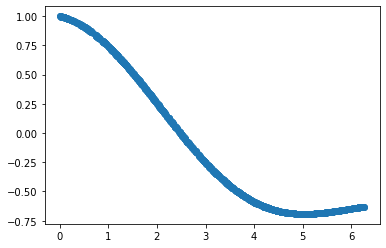

In [9]:
# Отобразим данные для обучения
plt.scatter(train_data[:, 0], train_data[:, 1])

In [30]:
# Создадим загрузчик данных
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True
)

In [31]:
# Класс для генератора
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Использование таких словарей позволяет нам варьировать параметры нашей сети в процессе использования
        self.activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU(0.2, inplace=True)],
                ['relu', nn.ReLU(0.2)]])
        
        def block(in_feat, out_feat, normalize=True, activation='relu'): #activation='relu
            layers = [nn.Linear(in_feat, out_feat)] # Если мы создаем последовательность слоев - то мы задаем их
                                                    # с помощью списка.
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(self.activations[activation]) # Эта сторчка означает тоже самое что и
                                                       # layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False), # Звездочка означает unpacking списка
            *block(128, 256, activation='lrelu'),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, latent_dim),
            nn.Tanh()
        )

    def forward(self, z):
        output = self.model(z)
        return output

In [32]:
# Класс дискриминатора
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
  

    def forward(self, x):
        validity = self.model(x)

        return validity

In [33]:
# Параметры обучения
##################################
n_epochs = 200 # количество эпох
lr = 0.0002 # шаг обучения

b1 = 0.5 # гиперпараметр для оптимайзера Adam
b2 = 0.999 # гиперпараметр для оптимайзера Adam

latent_dim = 2 # Размерность случайного вектора, который подается на вход генератору


sample_interval = 25 # количество картинок для отображения процесса обучения

In [34]:
generator = Generator()
discriminator = Discriminator()

# Для каждой нейронки свой опитимизатор
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

# Но вот функция ошибки у нас будет одна общая
adversarial_loss = torch.nn.BCELoss()

In [35]:
d_loss_history = []
g_loss_history = []

[Epoch 0/200] [Batch 0/32] [D loss: 0.698935] [G loss: 0.730338]


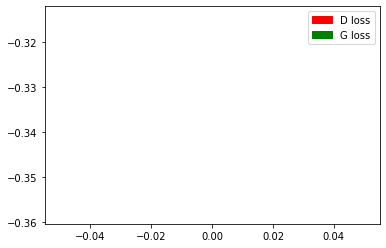

[Epoch 0/200] [Batch 25/32] [D loss: 0.345704] [G loss: 1.103275]


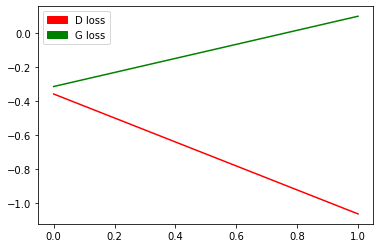

[Epoch 1/200] [Batch 18/32] [D loss: 0.303513] [G loss: 1.510960]


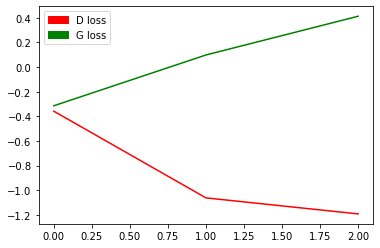

[Epoch 2/200] [Batch 11/32] [D loss: 0.333798] [G loss: 1.381290]


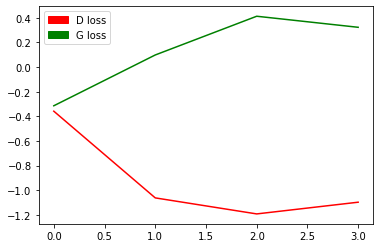

[Epoch 3/200] [Batch 4/32] [D loss: 0.281341] [G loss: 1.562026]


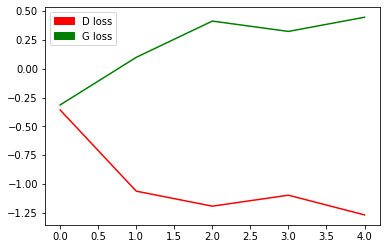

[Epoch 3/200] [Batch 29/32] [D loss: 0.310238] [G loss: 1.815446]


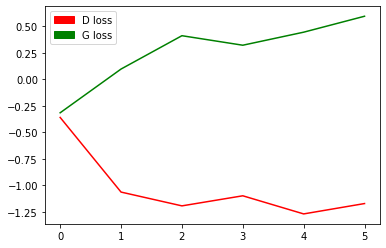

[Epoch 4/200] [Batch 22/32] [D loss: 0.239412] [G loss: 1.659287]


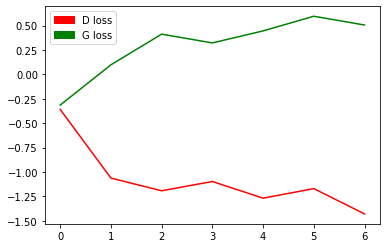

[Epoch 5/200] [Batch 15/32] [D loss: 0.279849] [G loss: 1.656600]


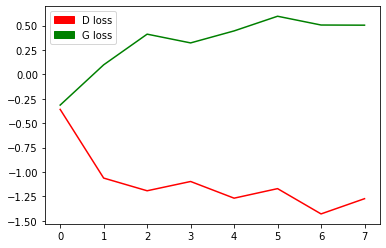

[Epoch 6/200] [Batch 8/32] [D loss: 0.229829] [G loss: 1.735878]


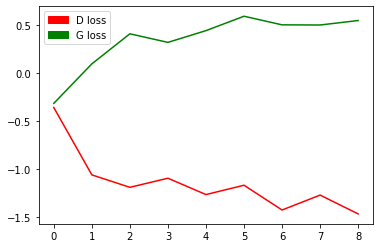

[Epoch 7/200] [Batch 1/32] [D loss: 0.262216] [G loss: 1.563076]


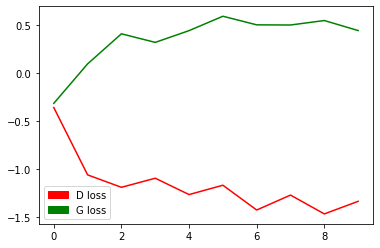

[Epoch 7/200] [Batch 26/32] [D loss: 0.297574] [G loss: 1.967566]


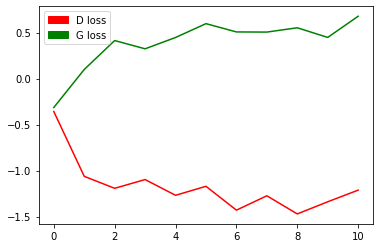

[Epoch 8/200] [Batch 19/32] [D loss: 0.215838] [G loss: 1.994611]


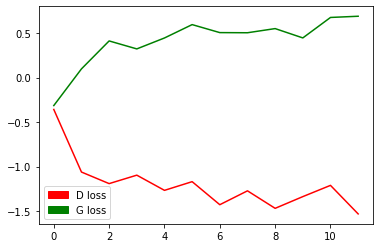

[Epoch 9/200] [Batch 12/32] [D loss: 0.386875] [G loss: 2.078092]


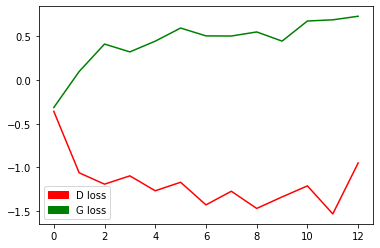

[Epoch 10/200] [Batch 5/32] [D loss: 0.233029] [G loss: 1.964588]


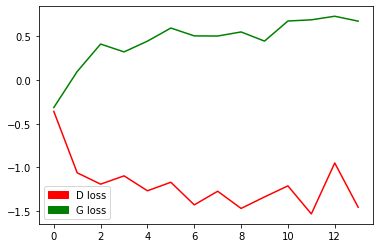

[Epoch 10/200] [Batch 30/32] [D loss: 0.311749] [G loss: 1.734212]


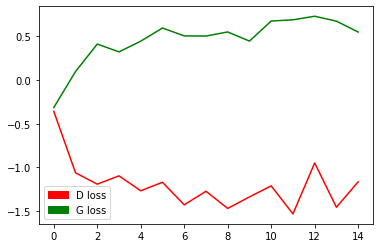

[Epoch 11/200] [Batch 23/32] [D loss: 0.234417] [G loss: 1.756148]


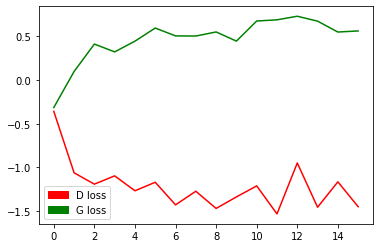

[Epoch 12/200] [Batch 16/32] [D loss: 0.259233] [G loss: 2.015648]


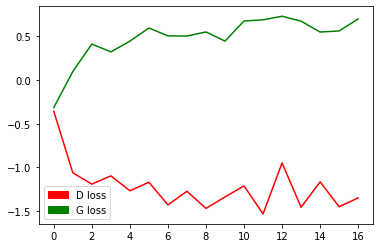

[Epoch 13/200] [Batch 9/32] [D loss: 0.291228] [G loss: 1.661607]


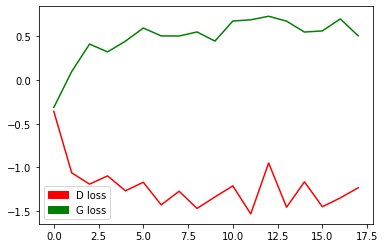

[Epoch 14/200] [Batch 2/32] [D loss: 0.155235] [G loss: 1.799685]


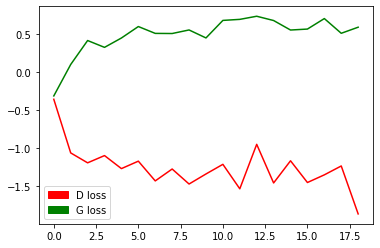

[Epoch 14/200] [Batch 27/32] [D loss: 0.125956] [G loss: 1.713826]


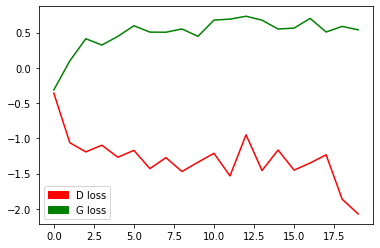

[Epoch 15/200] [Batch 20/32] [D loss: 0.155291] [G loss: 1.928256]


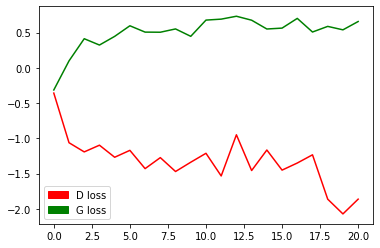

[Epoch 16/200] [Batch 13/32] [D loss: 0.182060] [G loss: 1.979529]


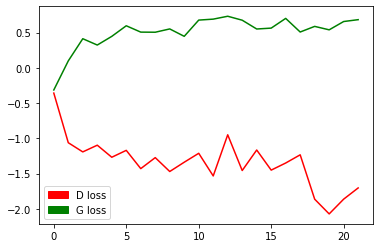

[Epoch 17/200] [Batch 6/32] [D loss: 0.236241] [G loss: 1.783592]


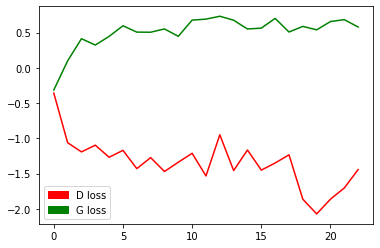

[Epoch 17/200] [Batch 31/32] [D loss: 0.214890] [G loss: 1.892616]


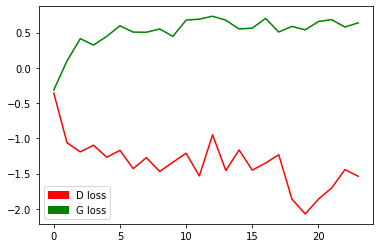

[Epoch 18/200] [Batch 24/32] [D loss: 0.174920] [G loss: 1.891614]


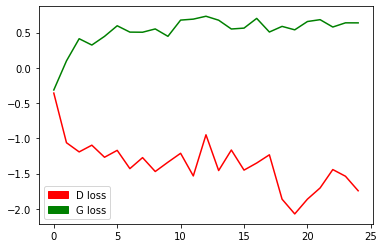

[Epoch 19/200] [Batch 17/32] [D loss: 0.413216] [G loss: 2.042538]


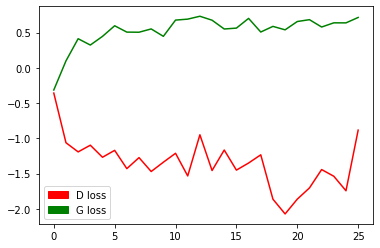

[Epoch 20/200] [Batch 10/32] [D loss: 0.252513] [G loss: 1.857223]


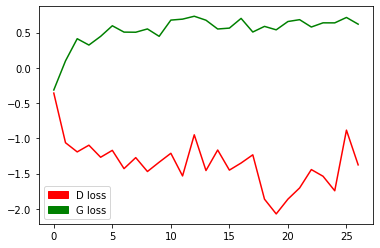

[Epoch 21/200] [Batch 3/32] [D loss: 0.163590] [G loss: 1.910960]


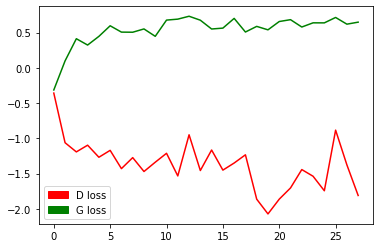

[Epoch 21/200] [Batch 28/32] [D loss: 0.262943] [G loss: 1.989238]


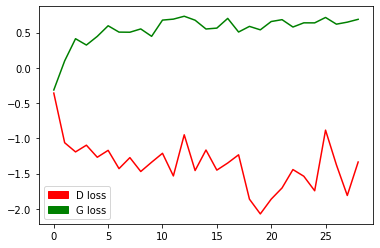

[Epoch 22/200] [Batch 21/32] [D loss: 0.221431] [G loss: 1.741449]


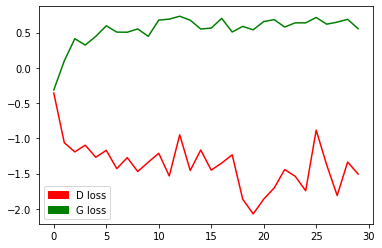

[Epoch 23/200] [Batch 14/32] [D loss: 0.197628] [G loss: 1.882358]


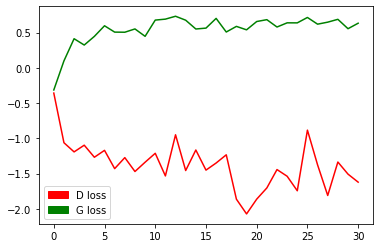

[Epoch 24/200] [Batch 7/32] [D loss: 0.195596] [G loss: 1.924294]


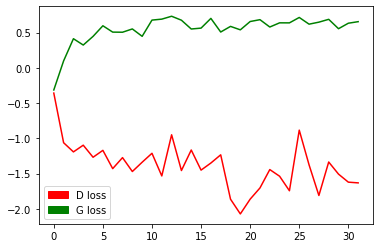

[Epoch 25/200] [Batch 0/32] [D loss: 0.129145] [G loss: 1.975700]


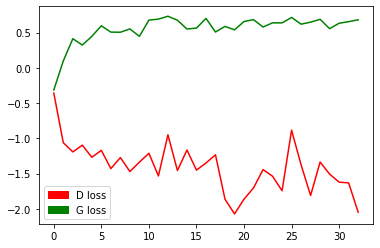

[Epoch 25/200] [Batch 25/32] [D loss: 0.255931] [G loss: 1.943272]


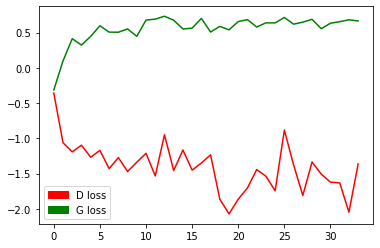

[Epoch 26/200] [Batch 18/32] [D loss: 0.178410] [G loss: 1.860356]


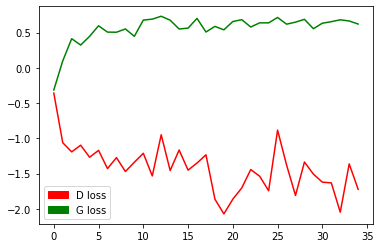

[Epoch 27/200] [Batch 11/32] [D loss: 0.233351] [G loss: 2.223647]


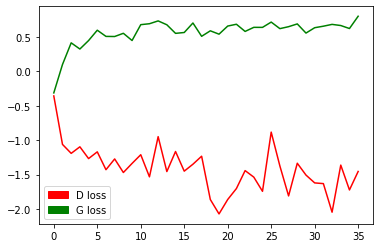

[Epoch 28/200] [Batch 4/32] [D loss: 0.274777] [G loss: 2.037961]


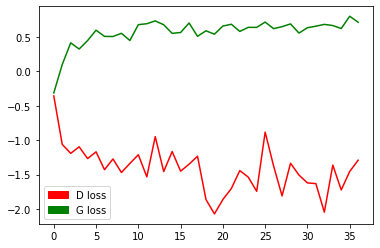

[Epoch 28/200] [Batch 29/32] [D loss: 0.393199] [G loss: 1.952873]


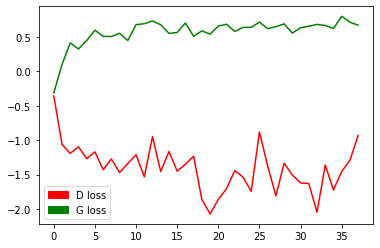

[Epoch 29/200] [Batch 22/32] [D loss: 0.322729] [G loss: 1.825738]


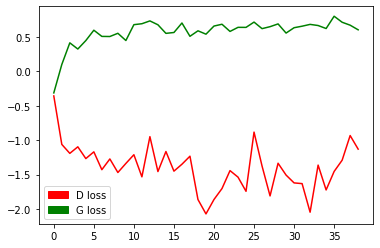

[Epoch 30/200] [Batch 15/32] [D loss: 0.250228] [G loss: 2.203232]


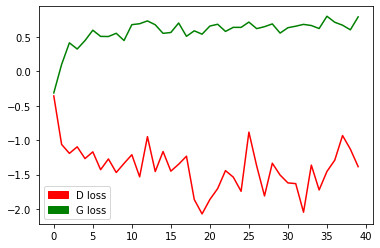

[Epoch 31/200] [Batch 8/32] [D loss: 0.232932] [G loss: 2.292139]


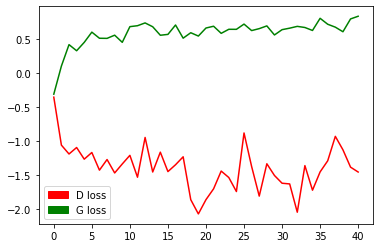

[Epoch 32/200] [Batch 1/32] [D loss: 0.245661] [G loss: 1.680825]


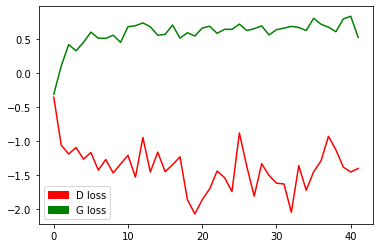

[Epoch 32/200] [Batch 26/32] [D loss: 0.201694] [G loss: 1.929184]


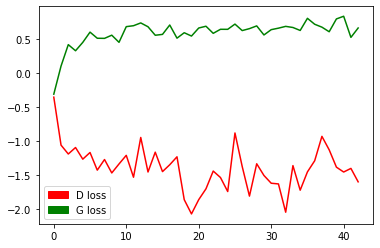

[Epoch 33/200] [Batch 19/32] [D loss: 0.229581] [G loss: 1.865551]


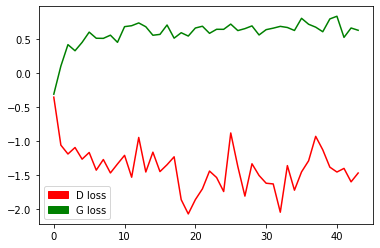

[Epoch 34/200] [Batch 12/32] [D loss: 0.179902] [G loss: 1.813873]


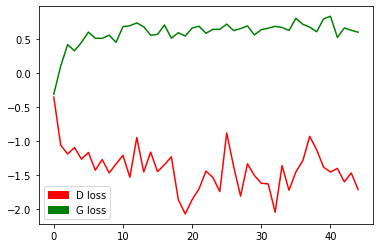

[Epoch 35/200] [Batch 5/32] [D loss: 0.256219] [G loss: 1.905752]


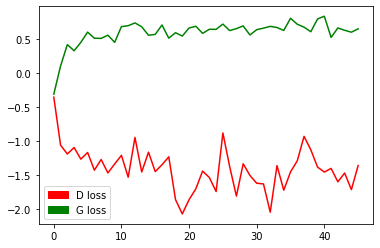

[Epoch 35/200] [Batch 30/32] [D loss: 0.205542] [G loss: 1.932789]


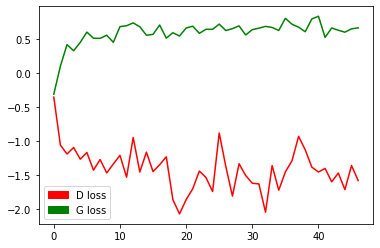

[Epoch 36/200] [Batch 23/32] [D loss: 0.268475] [G loss: 2.154021]


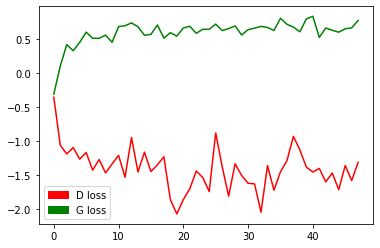

[Epoch 37/200] [Batch 16/32] [D loss: 0.167233] [G loss: 2.038263]


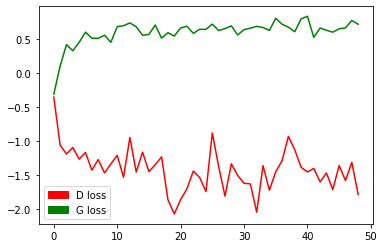

[Epoch 38/200] [Batch 9/32] [D loss: 0.119341] [G loss: 1.957586]


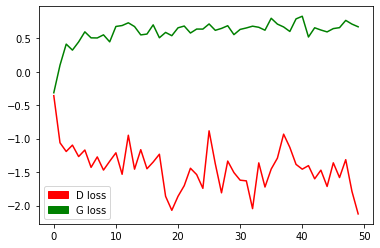

[Epoch 39/200] [Batch 2/32] [D loss: 0.163185] [G loss: 1.958123]


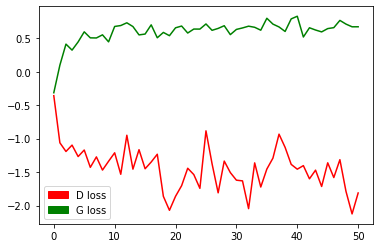

[Epoch 39/200] [Batch 27/32] [D loss: 0.198777] [G loss: 2.001402]


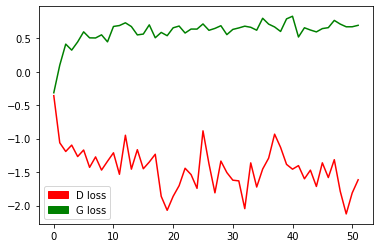

[Epoch 40/200] [Batch 20/32] [D loss: 0.321767] [G loss: 1.985455]


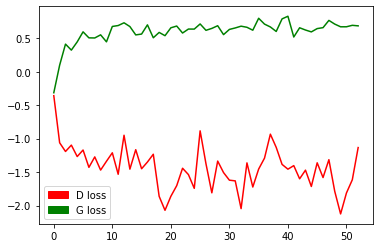

[Epoch 41/200] [Batch 13/32] [D loss: 0.121687] [G loss: 1.867249]


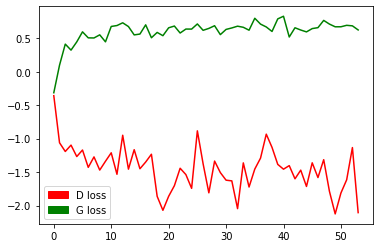

[Epoch 42/200] [Batch 6/32] [D loss: 0.258458] [G loss: 2.031997]


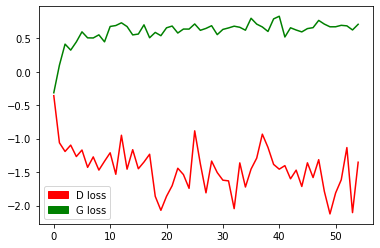

[Epoch 42/200] [Batch 31/32] [D loss: 0.199949] [G loss: 1.839550]


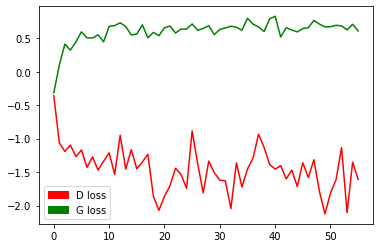

[Epoch 43/200] [Batch 24/32] [D loss: 0.186205] [G loss: 1.720296]


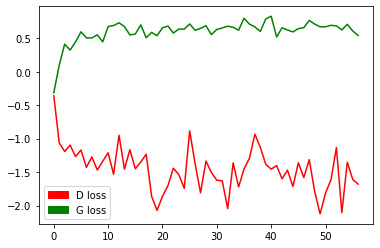

[Epoch 44/200] [Batch 17/32] [D loss: 0.223386] [G loss: 1.867303]


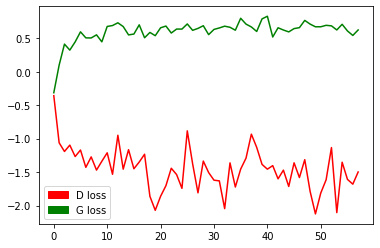

[Epoch 45/200] [Batch 10/32] [D loss: 0.343015] [G loss: 2.015903]


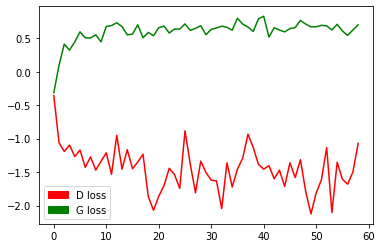

[Epoch 46/200] [Batch 3/32] [D loss: 0.166280] [G loss: 1.695115]


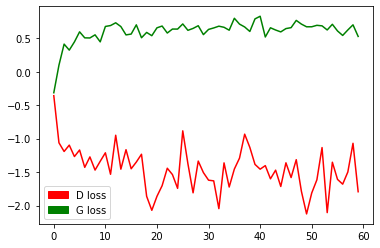

[Epoch 46/200] [Batch 28/32] [D loss: 0.252705] [G loss: 1.894593]


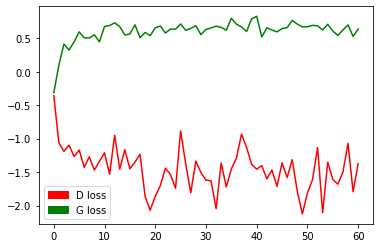

[Epoch 47/200] [Batch 21/32] [D loss: 0.247635] [G loss: 1.944570]


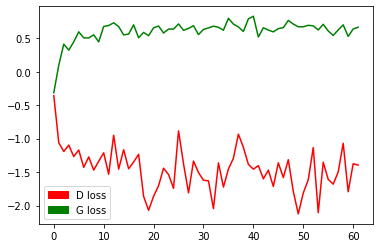

[Epoch 48/200] [Batch 14/32] [D loss: 0.160854] [G loss: 2.333016]


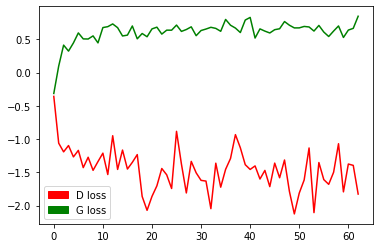

[Epoch 49/200] [Batch 7/32] [D loss: 0.248844] [G loss: 1.504762]


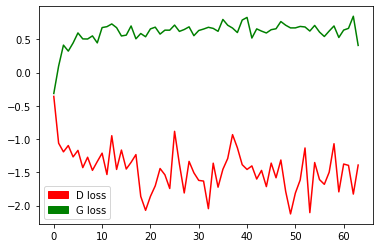

[Epoch 50/200] [Batch 0/32] [D loss: 0.243712] [G loss: 1.992319]


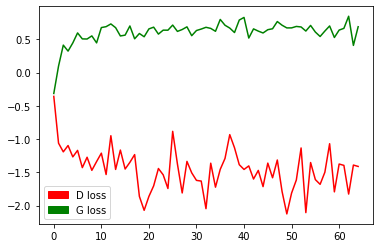

[Epoch 50/200] [Batch 25/32] [D loss: 0.398553] [G loss: 2.090888]


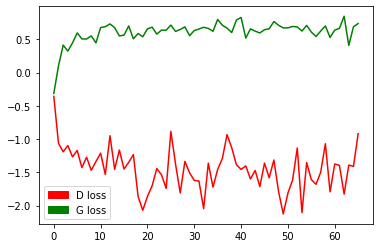

[Epoch 51/200] [Batch 18/32] [D loss: 0.311845] [G loss: 2.096195]


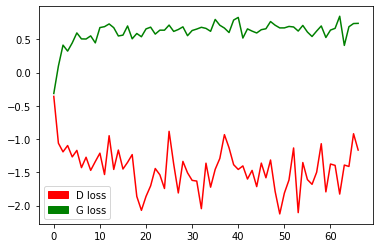

[Epoch 52/200] [Batch 11/32] [D loss: 0.136555] [G loss: 1.953449]


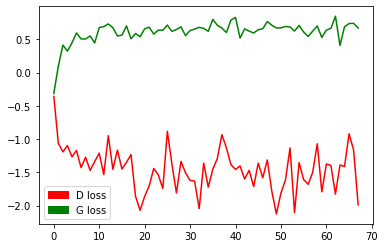

[Epoch 53/200] [Batch 4/32] [D loss: 0.278018] [G loss: 2.109266]


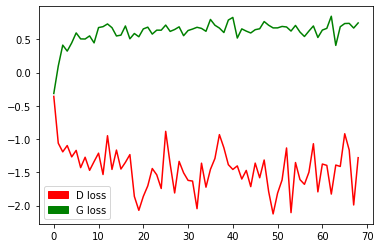

[Epoch 53/200] [Batch 29/32] [D loss: 0.166745] [G loss: 2.015373]


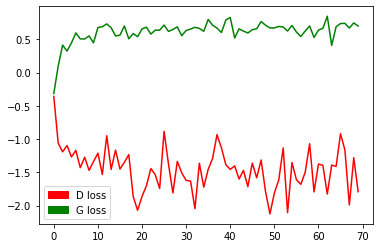

[Epoch 54/200] [Batch 22/32] [D loss: 0.303801] [G loss: 1.969750]


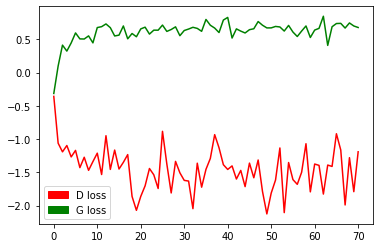

[Epoch 55/200] [Batch 15/32] [D loss: 0.284978] [G loss: 2.303405]


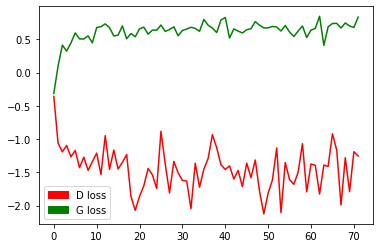

[Epoch 56/200] [Batch 8/32] [D loss: 0.199253] [G loss: 1.825042]


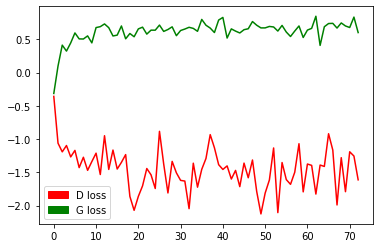

[Epoch 57/200] [Batch 1/32] [D loss: 0.256809] [G loss: 2.214701]


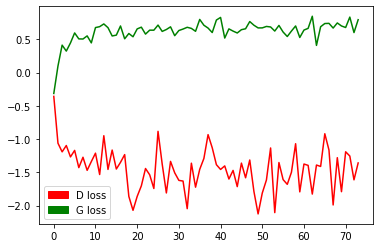

[Epoch 57/200] [Batch 26/32] [D loss: 0.195552] [G loss: 1.847602]


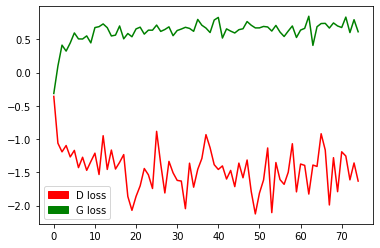

[Epoch 58/200] [Batch 19/32] [D loss: 0.140560] [G loss: 2.101823]


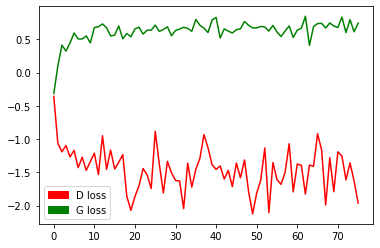

[Epoch 59/200] [Batch 12/32] [D loss: 0.229738] [G loss: 1.904412]


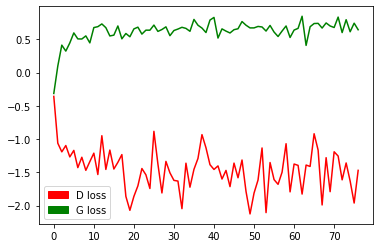

[Epoch 60/200] [Batch 5/32] [D loss: 0.225255] [G loss: 1.936624]


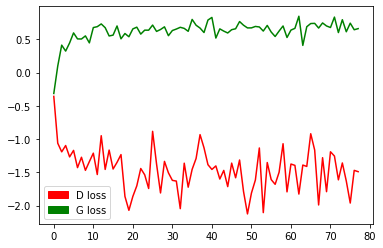

[Epoch 60/200] [Batch 30/32] [D loss: 0.169639] [G loss: 1.947615]


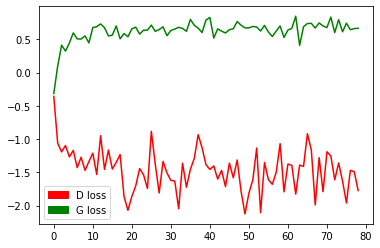

[Epoch 61/200] [Batch 23/32] [D loss: 0.296494] [G loss: 2.114285]


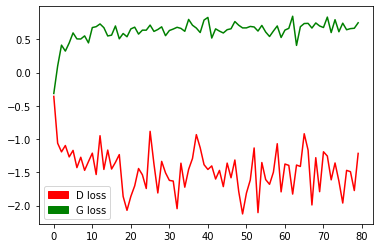

[Epoch 62/200] [Batch 16/32] [D loss: 0.355555] [G loss: 2.136028]


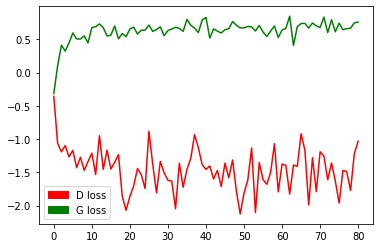

[Epoch 63/200] [Batch 9/32] [D loss: 0.248971] [G loss: 2.104281]


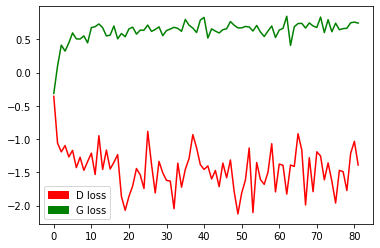

[Epoch 64/200] [Batch 2/32] [D loss: 0.254596] [G loss: 2.097279]


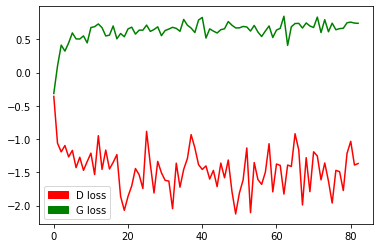

[Epoch 64/200] [Batch 27/32] [D loss: 0.194706] [G loss: 2.123645]


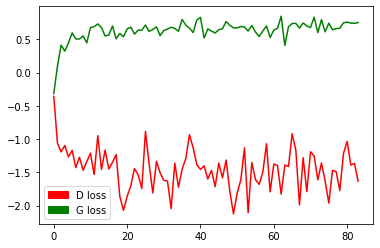

[Epoch 65/200] [Batch 20/32] [D loss: 0.167686] [G loss: 2.048243]


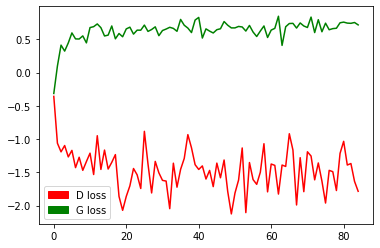

[Epoch 66/200] [Batch 13/32] [D loss: 0.260776] [G loss: 2.053465]


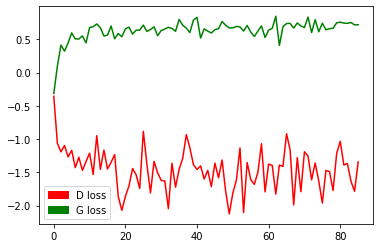

[Epoch 67/200] [Batch 6/32] [D loss: 0.214148] [G loss: 1.878779]


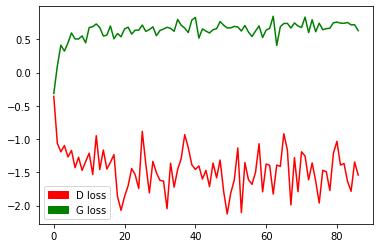

[Epoch 67/200] [Batch 31/32] [D loss: 0.193702] [G loss: 2.136133]


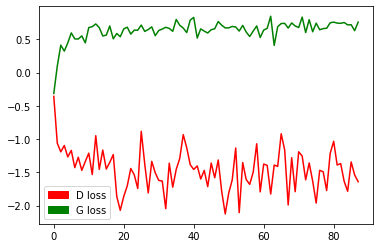

[Epoch 68/200] [Batch 24/32] [D loss: 0.208359] [G loss: 1.678338]


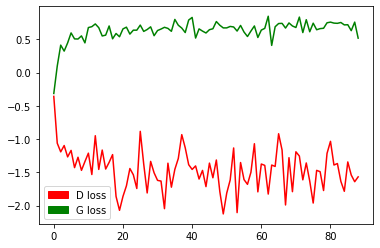

[Epoch 69/200] [Batch 17/32] [D loss: 0.197870] [G loss: 2.015174]


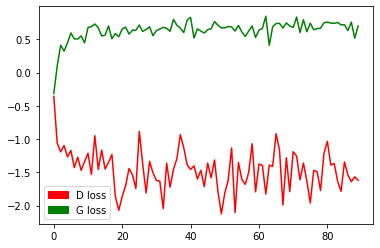

[Epoch 70/200] [Batch 10/32] [D loss: 0.252890] [G loss: 1.828074]


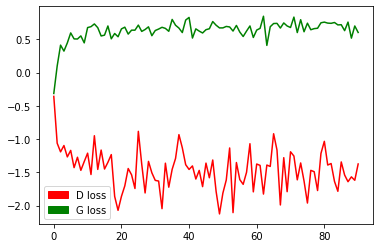

[Epoch 71/200] [Batch 3/32] [D loss: 0.140782] [G loss: 2.065286]


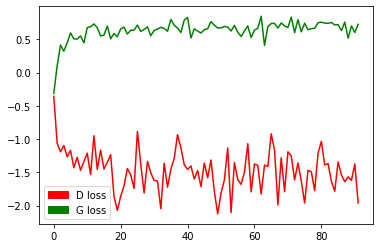

[Epoch 71/200] [Batch 28/32] [D loss: 0.308396] [G loss: 2.086379]


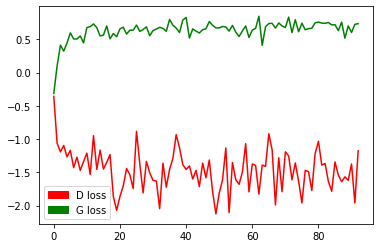

[Epoch 72/200] [Batch 21/32] [D loss: 0.220108] [G loss: 1.870483]


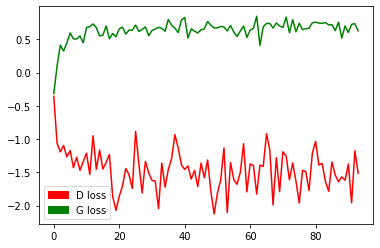

[Epoch 73/200] [Batch 14/32] [D loss: 0.168273] [G loss: 1.976480]


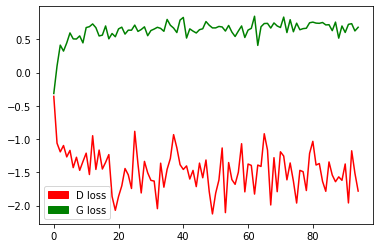

[Epoch 74/200] [Batch 7/32] [D loss: 0.249817] [G loss: 2.168497]


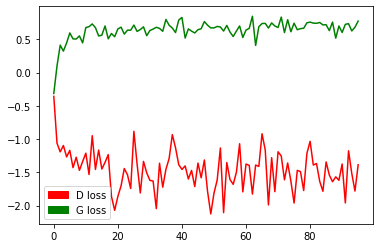

[Epoch 75/200] [Batch 0/32] [D loss: 0.247188] [G loss: 1.939055]


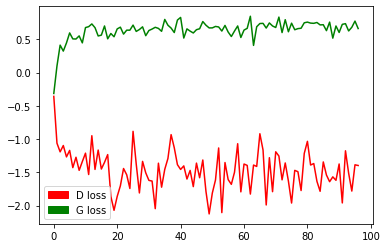

[Epoch 75/200] [Batch 25/32] [D loss: 0.166612] [G loss: 2.212659]


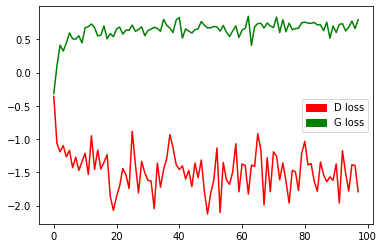

[Epoch 76/200] [Batch 18/32] [D loss: 0.173669] [G loss: 1.863981]


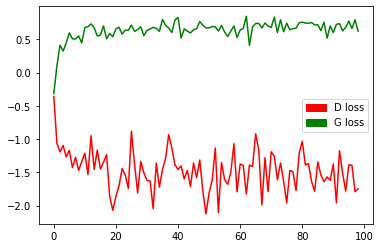

[Epoch 77/200] [Batch 11/32] [D loss: 0.203392] [G loss: 2.044250]


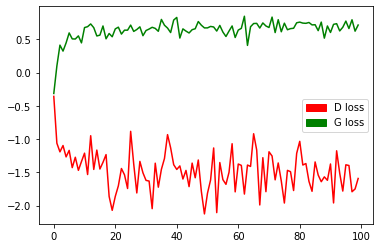

[Epoch 78/200] [Batch 4/32] [D loss: 0.280319] [G loss: 1.801897]


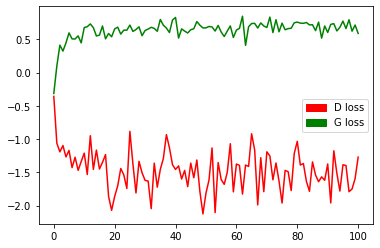

[Epoch 78/200] [Batch 29/32] [D loss: 0.130511] [G loss: 2.069221]


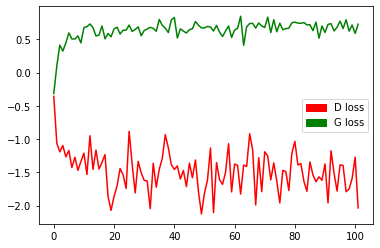

[Epoch 79/200] [Batch 22/32] [D loss: 0.248799] [G loss: 1.772002]


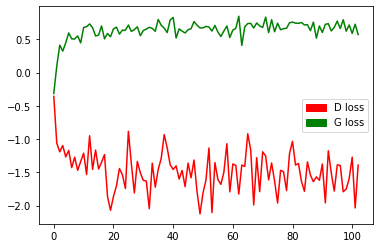

[Epoch 80/200] [Batch 15/32] [D loss: 0.176707] [G loss: 2.186509]


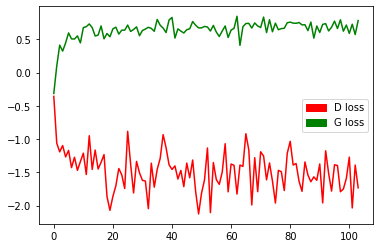

[Epoch 81/200] [Batch 8/32] [D loss: 0.198025] [G loss: 1.957246]


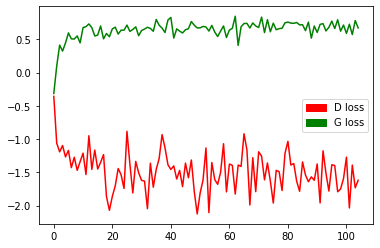

[Epoch 82/200] [Batch 1/32] [D loss: 0.187730] [G loss: 2.050295]


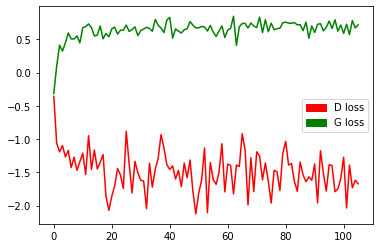

[Epoch 82/200] [Batch 26/32] [D loss: 0.283943] [G loss: 1.863665]


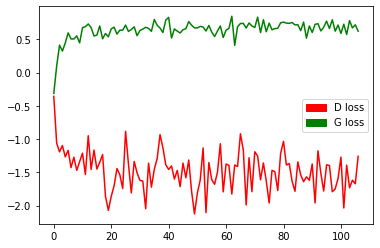

[Epoch 83/200] [Batch 19/32] [D loss: 0.168304] [G loss: 2.142378]


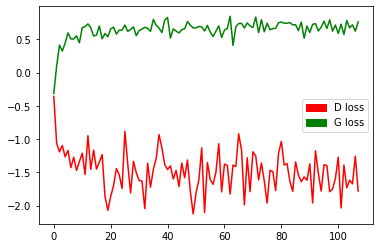

[Epoch 84/200] [Batch 12/32] [D loss: 0.226536] [G loss: 2.117235]


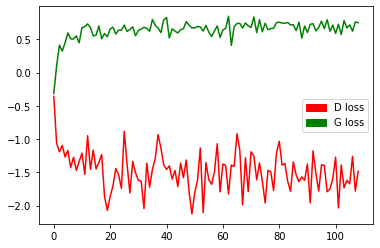

[Epoch 85/200] [Batch 5/32] [D loss: 0.311269] [G loss: 1.880143]


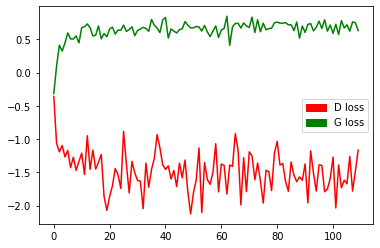

[Epoch 85/200] [Batch 30/32] [D loss: 0.181426] [G loss: 1.470906]


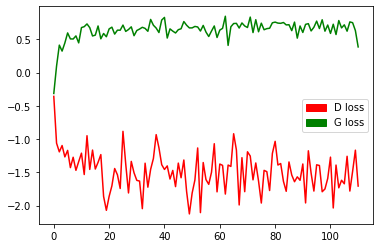

[Epoch 86/200] [Batch 23/32] [D loss: 0.289471] [G loss: 2.009768]


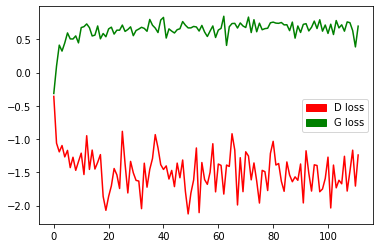

[Epoch 87/200] [Batch 16/32] [D loss: 0.270392] [G loss: 1.774767]


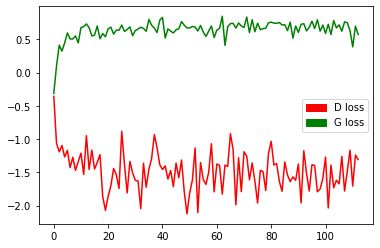

[Epoch 88/200] [Batch 9/32] [D loss: 0.201416] [G loss: 2.054989]


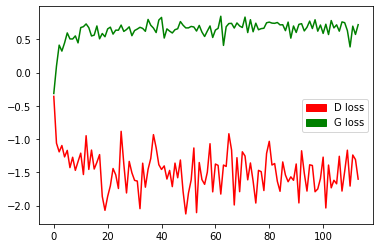

[Epoch 89/200] [Batch 2/32] [D loss: 0.240191] [G loss: 2.057955]


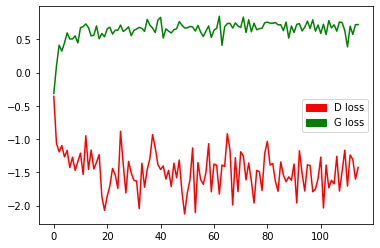

[Epoch 89/200] [Batch 27/32] [D loss: 0.202264] [G loss: 1.855639]


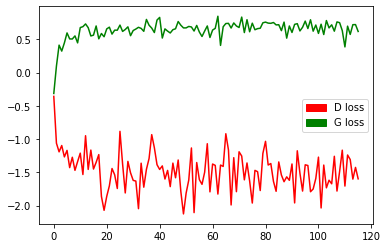

[Epoch 90/200] [Batch 20/32] [D loss: 0.297402] [G loss: 1.971282]


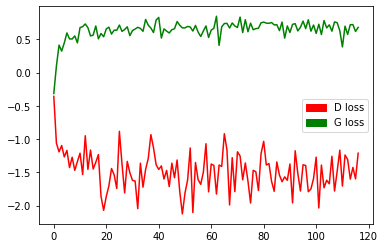

[Epoch 91/200] [Batch 13/32] [D loss: 0.182472] [G loss: 1.862784]


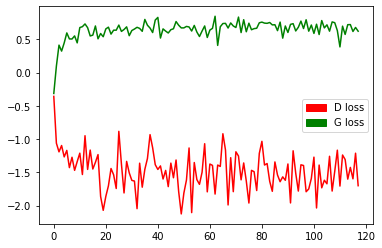

[Epoch 92/200] [Batch 6/32] [D loss: 0.127565] [G loss: 2.189273]


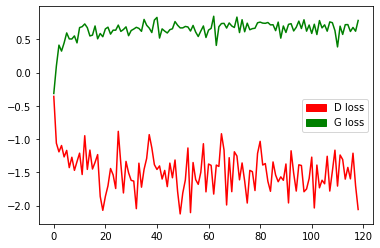

[Epoch 92/200] [Batch 31/32] [D loss: 0.256793] [G loss: 2.176453]


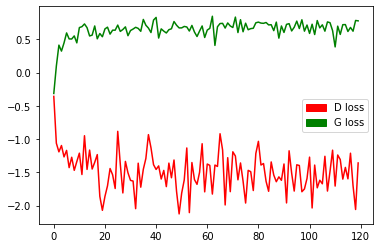

[Epoch 93/200] [Batch 24/32] [D loss: 0.234456] [G loss: 1.935577]


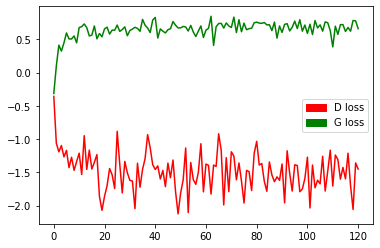

[Epoch 94/200] [Batch 17/32] [D loss: 0.217102] [G loss: 1.931249]


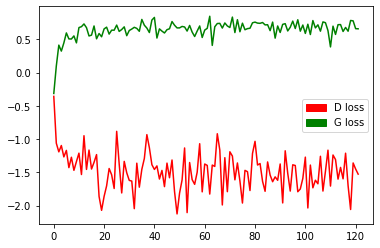

[Epoch 95/200] [Batch 10/32] [D loss: 0.199604] [G loss: 1.999877]


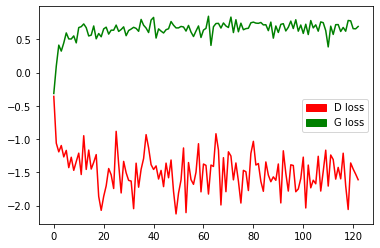

[Epoch 96/200] [Batch 3/32] [D loss: 0.203752] [G loss: 2.067273]


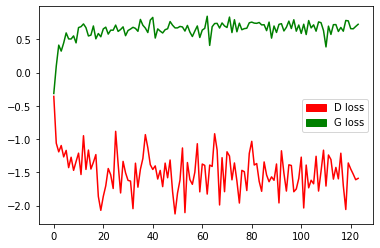

[Epoch 96/200] [Batch 28/32] [D loss: 0.357699] [G loss: 2.154496]


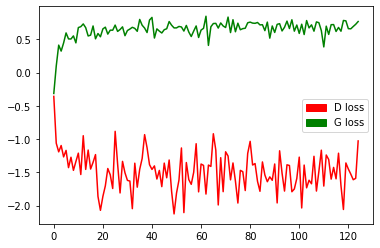

[Epoch 97/200] [Batch 21/32] [D loss: 0.263620] [G loss: 2.247139]


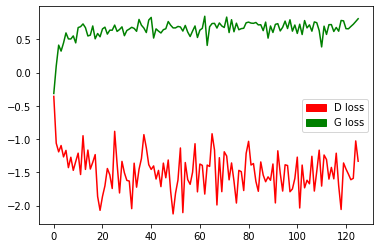

[Epoch 98/200] [Batch 14/32] [D loss: 0.308515] [G loss: 1.994564]


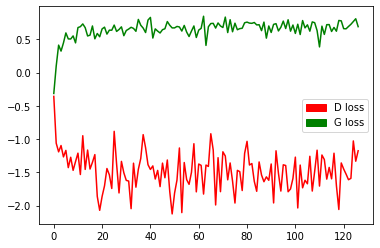

[Epoch 99/200] [Batch 7/32] [D loss: 0.316829] [G loss: 2.527262]


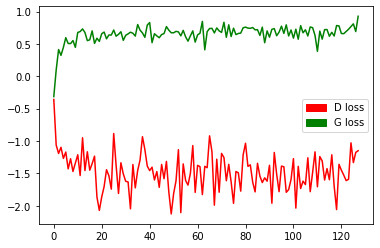

[Epoch 100/200] [Batch 0/32] [D loss: 0.320911] [G loss: 1.929354]


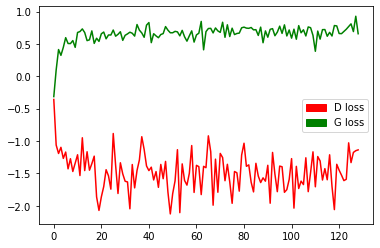

[Epoch 100/200] [Batch 25/32] [D loss: 0.196381] [G loss: 2.113257]


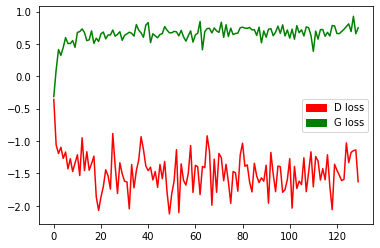

[Epoch 101/200] [Batch 18/32] [D loss: 0.150463] [G loss: 2.075691]


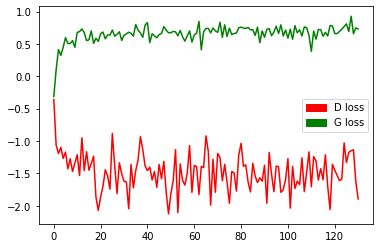

[Epoch 102/200] [Batch 11/32] [D loss: 0.207006] [G loss: 1.775790]


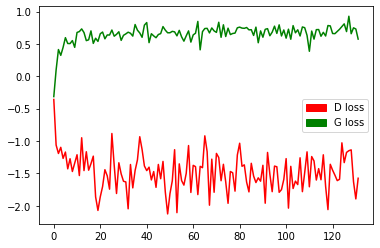

[Epoch 103/200] [Batch 4/32] [D loss: 0.172009] [G loss: 1.983399]


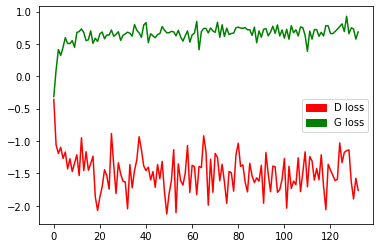

[Epoch 103/200] [Batch 29/32] [D loss: 0.265433] [G loss: 2.035408]


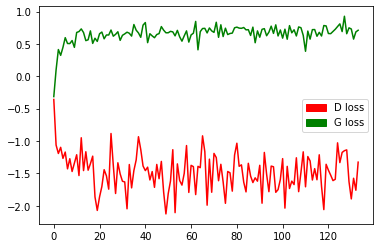

[Epoch 104/200] [Batch 22/32] [D loss: 0.197613] [G loss: 2.240374]


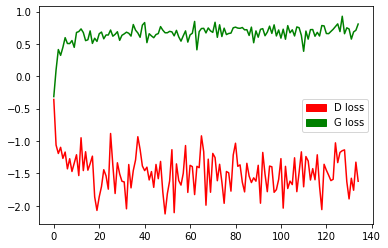

[Epoch 105/200] [Batch 15/32] [D loss: 0.132269] [G loss: 2.079118]


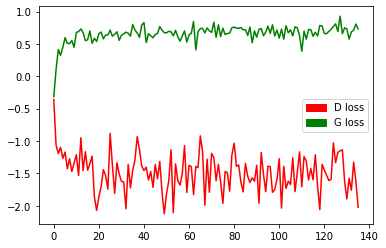

[Epoch 106/200] [Batch 8/32] [D loss: 0.235085] [G loss: 2.349475]


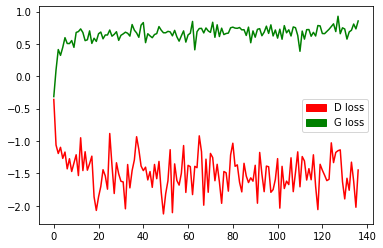

[Epoch 107/200] [Batch 1/32] [D loss: 0.134687] [G loss: 2.171780]


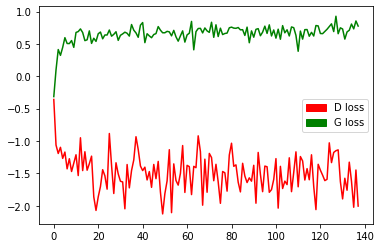

[Epoch 107/200] [Batch 26/32] [D loss: 0.331505] [G loss: 1.948989]


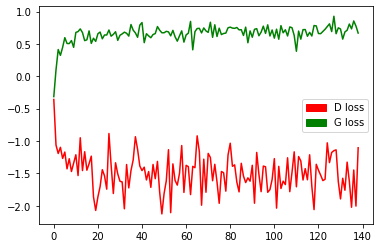

[Epoch 108/200] [Batch 19/32] [D loss: 0.177682] [G loss: 2.135186]


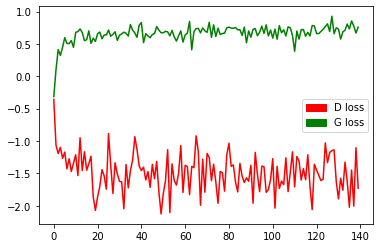

[Epoch 109/200] [Batch 12/32] [D loss: 0.193489] [G loss: 2.442697]


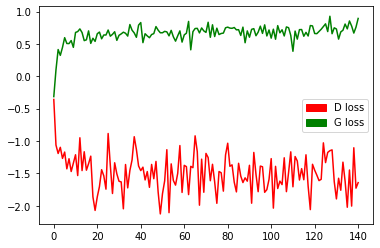

[Epoch 110/200] [Batch 5/32] [D loss: 0.082472] [G loss: 2.470677]


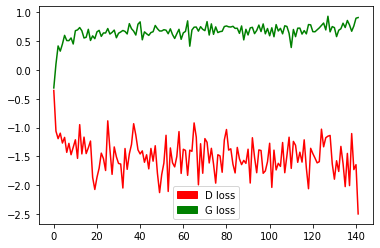

[Epoch 110/200] [Batch 30/32] [D loss: 0.212490] [G loss: 2.147356]


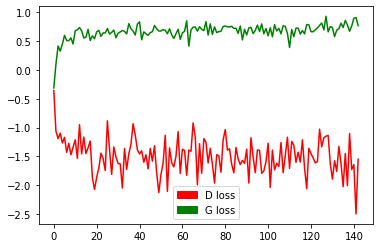

[Epoch 111/200] [Batch 23/32] [D loss: 0.260217] [G loss: 2.005229]


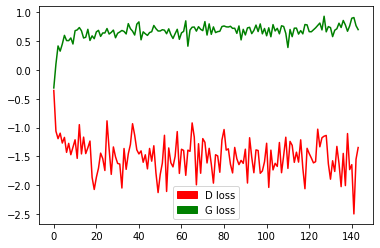

[Epoch 112/200] [Batch 16/32] [D loss: 0.374661] [G loss: 2.127552]


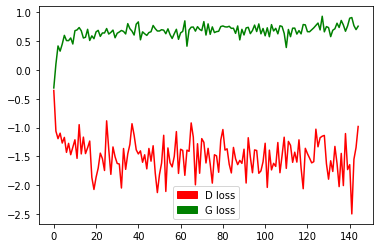

[Epoch 113/200] [Batch 9/32] [D loss: 0.165696] [G loss: 2.033904]


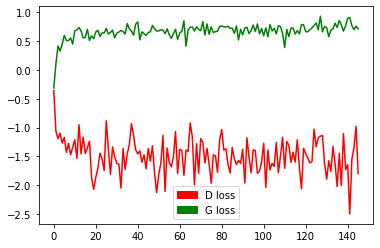

[Epoch 114/200] [Batch 2/32] [D loss: 0.095629] [G loss: 2.143618]


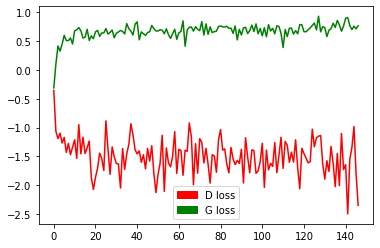

[Epoch 114/200] [Batch 27/32] [D loss: 0.270849] [G loss: 2.170011]


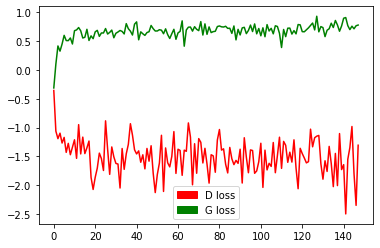

[Epoch 115/200] [Batch 20/32] [D loss: 0.201949] [G loss: 2.115480]


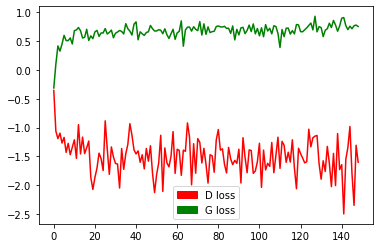

[Epoch 116/200] [Batch 13/32] [D loss: 0.176490] [G loss: 2.157266]


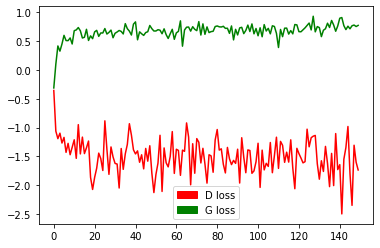

[Epoch 117/200] [Batch 6/32] [D loss: 0.202225] [G loss: 2.067871]


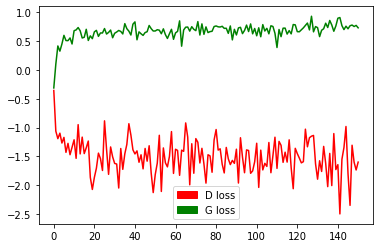

[Epoch 117/200] [Batch 31/32] [D loss: 0.228227] [G loss: 1.817695]


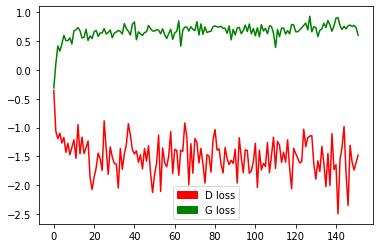

[Epoch 118/200] [Batch 24/32] [D loss: 0.259614] [G loss: 1.880308]


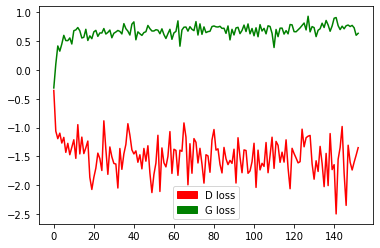

[Epoch 119/200] [Batch 17/32] [D loss: 0.244878] [G loss: 1.972269]


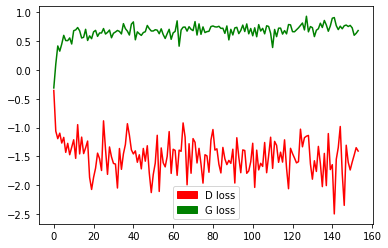

[Epoch 120/200] [Batch 10/32] [D loss: 0.228027] [G loss: 1.991419]


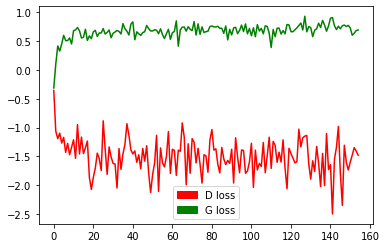

[Epoch 121/200] [Batch 3/32] [D loss: 0.172083] [G loss: 2.113290]


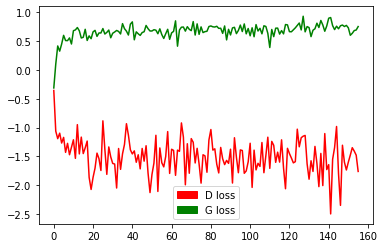

[Epoch 121/200] [Batch 28/32] [D loss: 0.165049] [G loss: 2.002630]


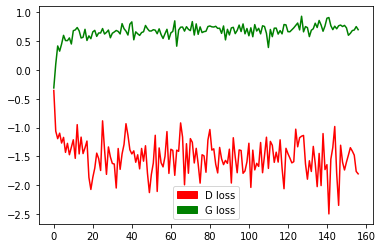

[Epoch 122/200] [Batch 21/32] [D loss: 0.236243] [G loss: 2.068003]


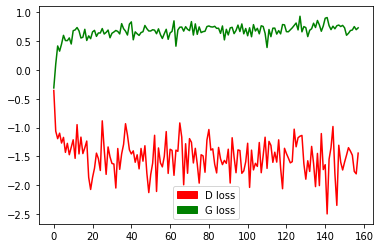

[Epoch 123/200] [Batch 14/32] [D loss: 0.230787] [G loss: 2.210608]


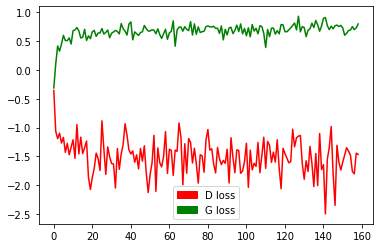

[Epoch 124/200] [Batch 7/32] [D loss: 0.175580] [G loss: 2.143032]


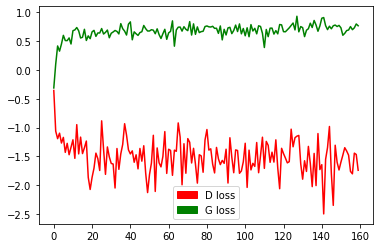

[Epoch 125/200] [Batch 0/32] [D loss: 0.263672] [G loss: 1.842148]


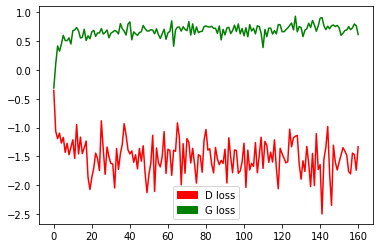

[Epoch 125/200] [Batch 25/32] [D loss: 0.309665] [G loss: 2.286293]


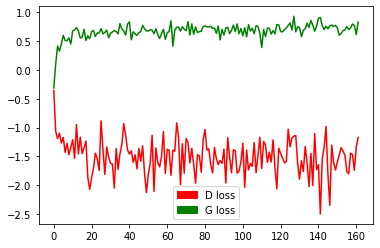

[Epoch 126/200] [Batch 18/32] [D loss: 0.256988] [G loss: 2.195257]


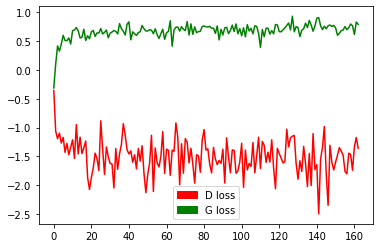

[Epoch 127/200] [Batch 11/32] [D loss: 0.426065] [G loss: 2.285808]


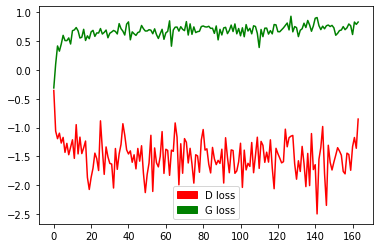

[Epoch 128/200] [Batch 4/32] [D loss: 0.108793] [G loss: 2.052221]


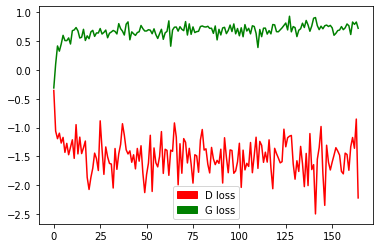

[Epoch 128/200] [Batch 29/32] [D loss: 0.201770] [G loss: 1.889231]


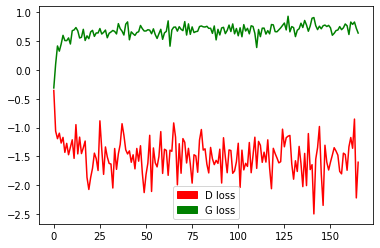

[Epoch 129/200] [Batch 22/32] [D loss: 0.172510] [G loss: 2.009975]


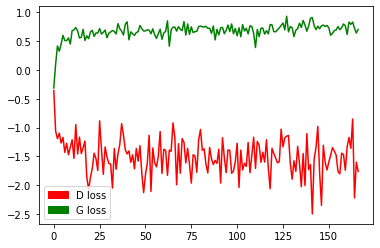

[Epoch 130/200] [Batch 15/32] [D loss: 0.326703] [G loss: 2.133656]


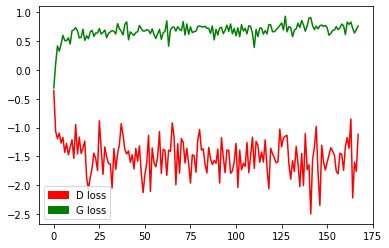

[Epoch 131/200] [Batch 8/32] [D loss: 0.275533] [G loss: 2.222833]


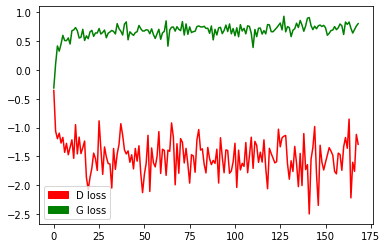

[Epoch 132/200] [Batch 1/32] [D loss: 0.231948] [G loss: 1.984030]


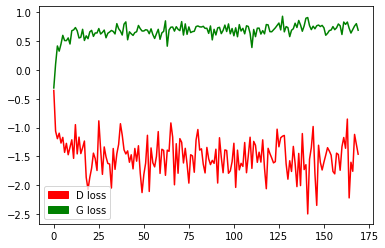

[Epoch 132/200] [Batch 26/32] [D loss: 0.194297] [G loss: 2.118934]


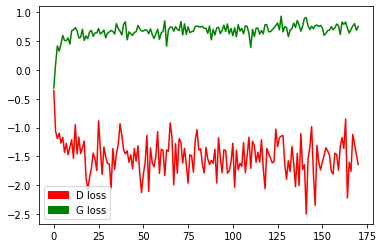

[Epoch 133/200] [Batch 19/32] [D loss: 0.174524] [G loss: 1.896155]


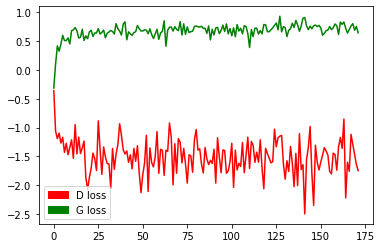

[Epoch 134/200] [Batch 12/32] [D loss: 0.194048] [G loss: 1.922070]


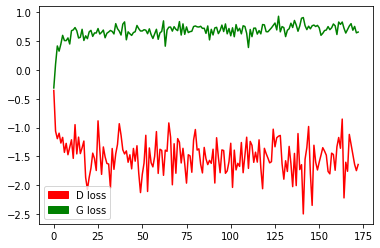

[Epoch 135/200] [Batch 5/32] [D loss: 0.206133] [G loss: 1.993052]


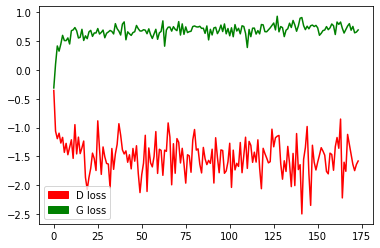

[Epoch 135/200] [Batch 30/32] [D loss: 0.324267] [G loss: 2.265241]


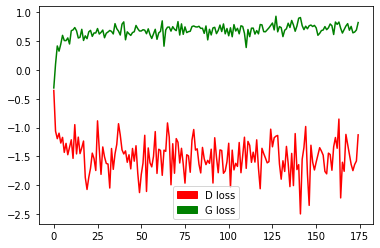

[Epoch 136/200] [Batch 23/32] [D loss: 0.257626] [G loss: 2.006843]


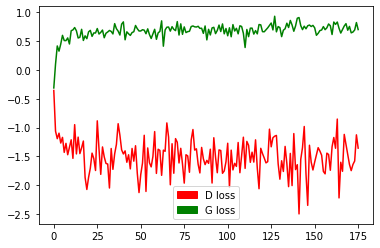

[Epoch 137/200] [Batch 16/32] [D loss: 0.195213] [G loss: 2.198750]


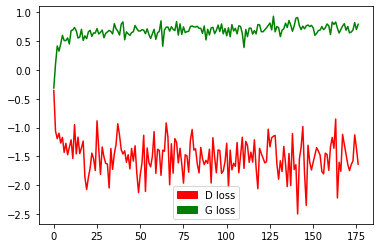

[Epoch 138/200] [Batch 9/32] [D loss: 0.205922] [G loss: 2.014483]


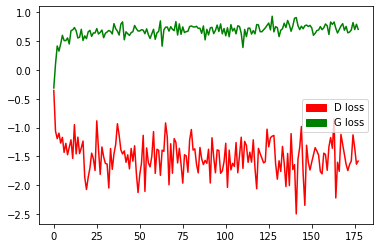

[Epoch 139/200] [Batch 2/32] [D loss: 0.262622] [G loss: 1.649119]


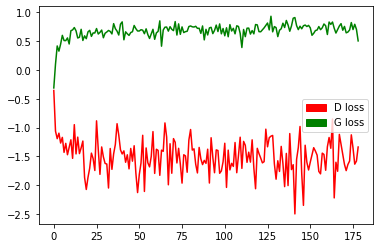

[Epoch 139/200] [Batch 27/32] [D loss: 0.098095] [G loss: 2.101660]


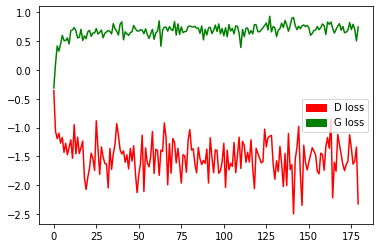

[Epoch 140/200] [Batch 20/32] [D loss: 0.340406] [G loss: 2.294883]


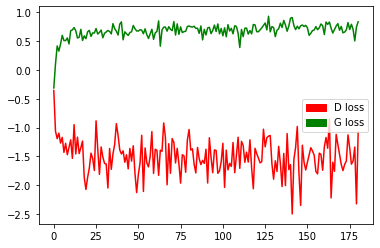

[Epoch 141/200] [Batch 13/32] [D loss: 0.104315] [G loss: 2.010322]


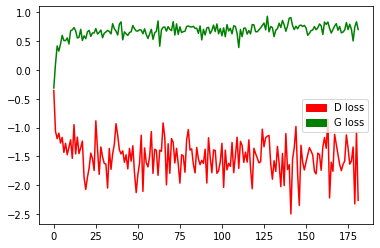

[Epoch 142/200] [Batch 6/32] [D loss: 0.240803] [G loss: 2.208261]


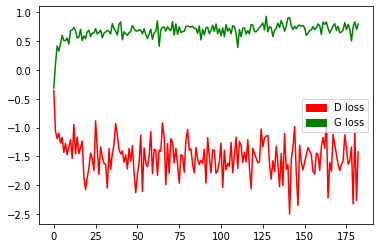

[Epoch 142/200] [Batch 31/32] [D loss: 0.077132] [G loss: 1.948336]


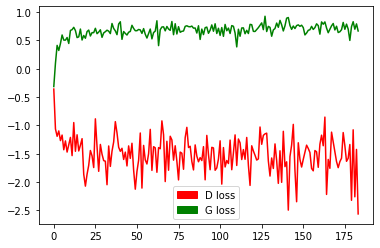

[Epoch 143/200] [Batch 24/32] [D loss: 0.130547] [G loss: 2.087231]


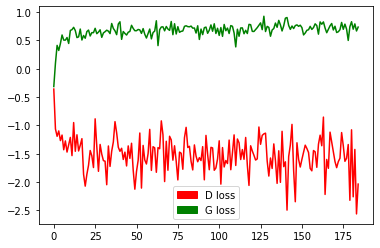

[Epoch 144/200] [Batch 17/32] [D loss: 0.356324] [G loss: 2.032226]


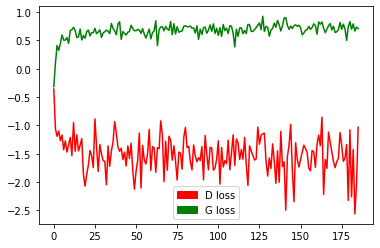

[Epoch 145/200] [Batch 10/32] [D loss: 0.220703] [G loss: 1.883797]


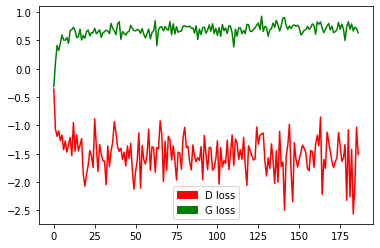

[Epoch 146/200] [Batch 3/32] [D loss: 0.256945] [G loss: 1.957216]


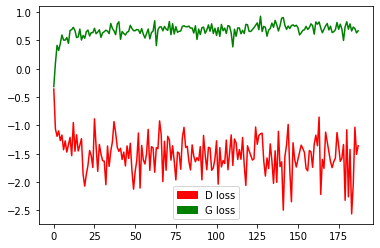

[Epoch 146/200] [Batch 28/32] [D loss: 0.203192] [G loss: 1.854440]


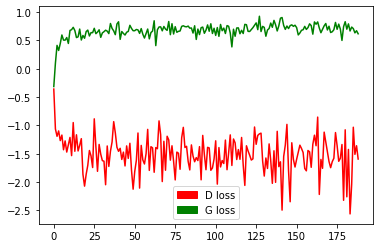

[Epoch 147/200] [Batch 21/32] [D loss: 0.192324] [G loss: 2.191092]


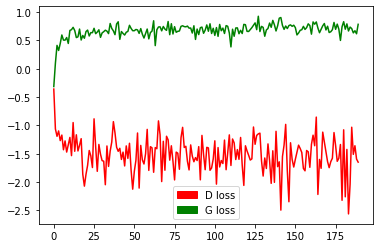

[Epoch 148/200] [Batch 14/32] [D loss: 0.200744] [G loss: 2.008102]


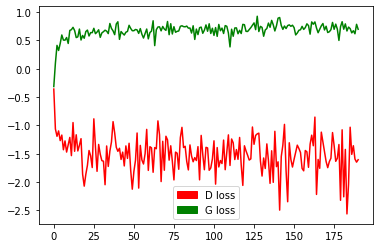

[Epoch 149/200] [Batch 7/32] [D loss: 0.196541] [G loss: 2.208485]


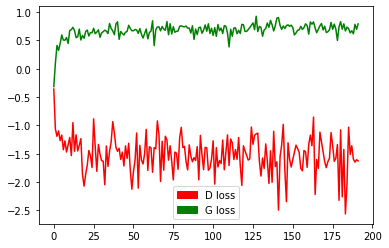

[Epoch 150/200] [Batch 0/32] [D loss: 0.258621] [G loss: 1.935905]


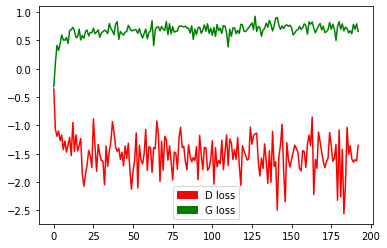

[Epoch 150/200] [Batch 25/32] [D loss: 0.262161] [G loss: 2.300761]


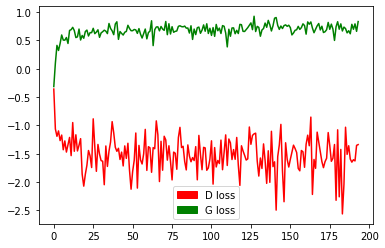

[Epoch 151/200] [Batch 18/32] [D loss: 0.339349] [G loss: 2.344152]


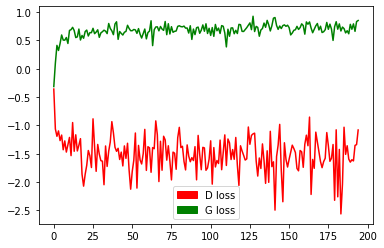

[Epoch 152/200] [Batch 11/32] [D loss: 0.260499] [G loss: 2.034164]


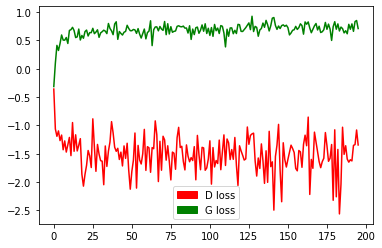

[Epoch 153/200] [Batch 4/32] [D loss: 0.323133] [G loss: 2.459076]


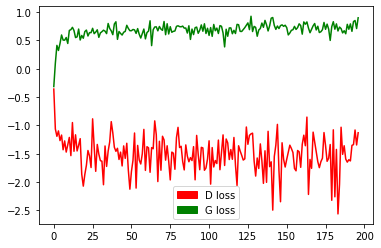

[Epoch 153/200] [Batch 29/32] [D loss: 0.162737] [G loss: 2.310106]


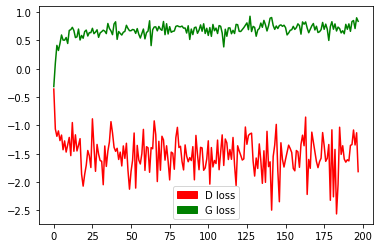

[Epoch 154/200] [Batch 22/32] [D loss: 0.161722] [G loss: 2.268555]


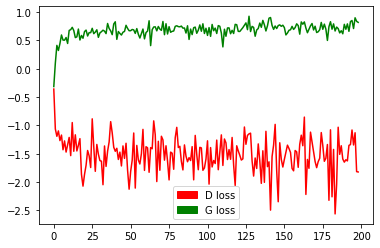

[Epoch 155/200] [Batch 15/32] [D loss: 0.097523] [G loss: 2.138709]


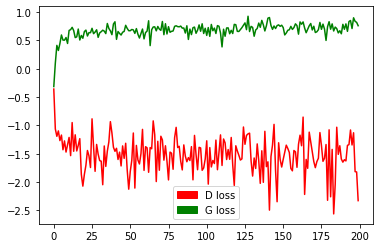

[Epoch 156/200] [Batch 8/32] [D loss: 0.231849] [G loss: 2.069917]


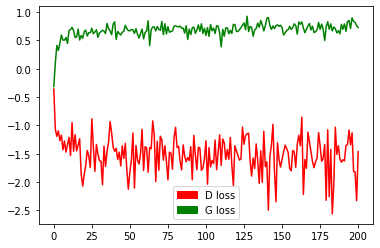

[Epoch 157/200] [Batch 1/32] [D loss: 0.161867] [G loss: 2.164004]


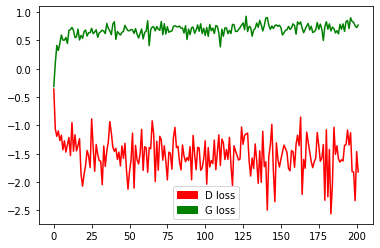

[Epoch 157/200] [Batch 26/32] [D loss: 0.196790] [G loss: 2.122899]


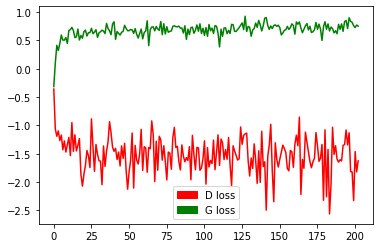

[Epoch 158/200] [Batch 19/32] [D loss: 0.233843] [G loss: 2.130105]


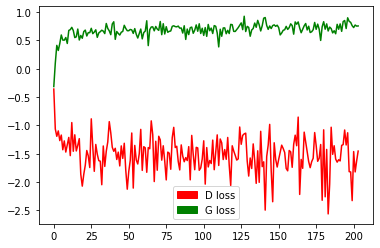

[Epoch 159/200] [Batch 12/32] [D loss: 0.228156] [G loss: 1.983993]


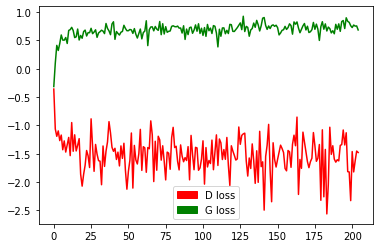

[Epoch 160/200] [Batch 5/32] [D loss: 0.233238] [G loss: 2.349719]


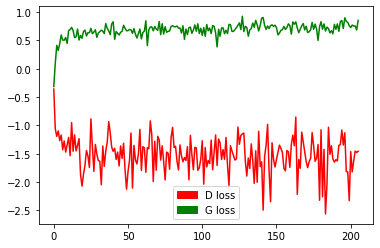

[Epoch 160/200] [Batch 30/32] [D loss: 0.110117] [G loss: 1.919409]


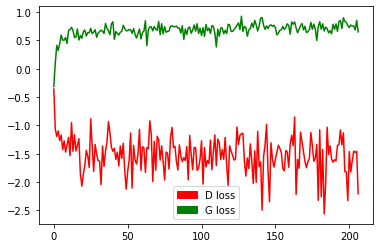

[Epoch 161/200] [Batch 23/32] [D loss: 0.293254] [G loss: 2.143018]


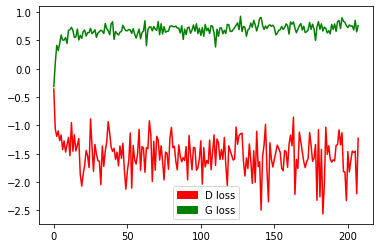

[Epoch 162/200] [Batch 16/32] [D loss: 0.091683] [G loss: 2.196688]


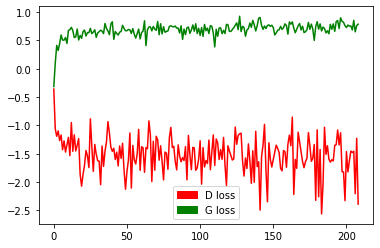

[Epoch 163/200] [Batch 9/32] [D loss: 0.198374] [G loss: 2.115704]


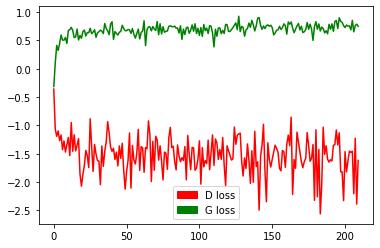

[Epoch 164/200] [Batch 2/32] [D loss: 0.270427] [G loss: 2.325764]


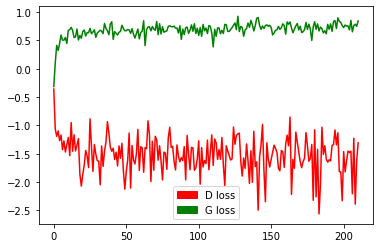

[Epoch 164/200] [Batch 27/32] [D loss: 0.242374] [G loss: 1.859799]


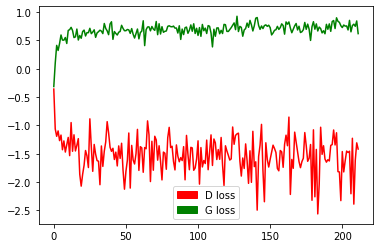

[Epoch 165/200] [Batch 20/32] [D loss: 0.245751] [G loss: 2.417798]


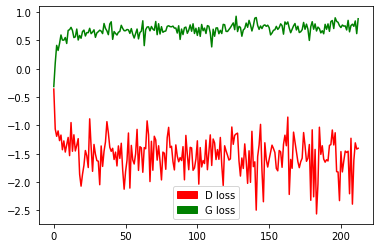

[Epoch 166/200] [Batch 13/32] [D loss: 0.235692] [G loss: 2.340443]


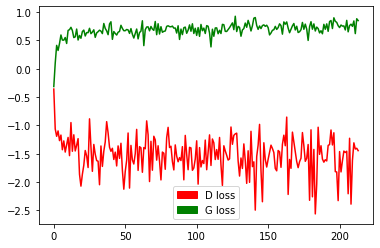

[Epoch 167/200] [Batch 6/32] [D loss: 0.191203] [G loss: 1.986383]


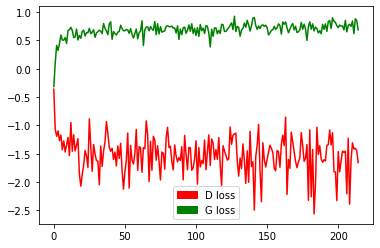

[Epoch 167/200] [Batch 31/32] [D loss: 0.133432] [G loss: 2.065759]


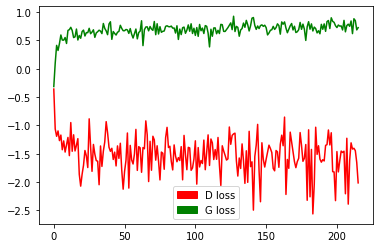

[Epoch 168/200] [Batch 24/32] [D loss: 0.209564] [G loss: 1.914820]


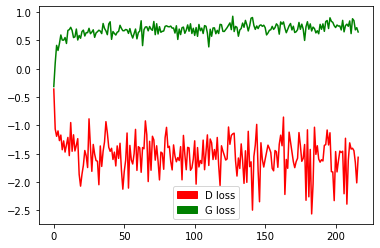

[Epoch 169/200] [Batch 17/32] [D loss: 0.063235] [G loss: 2.131340]


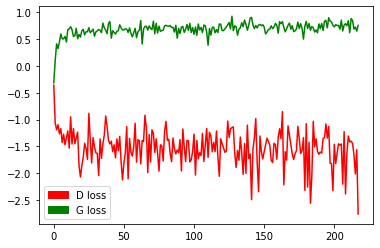

[Epoch 170/200] [Batch 10/32] [D loss: 0.131709] [G loss: 2.112500]


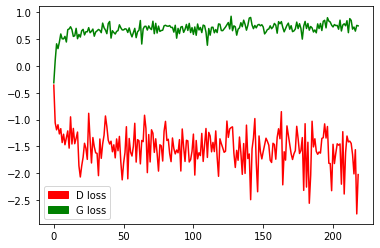

[Epoch 171/200] [Batch 3/32] [D loss: 0.186876] [G loss: 2.262909]


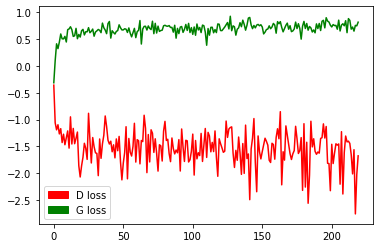

[Epoch 171/200] [Batch 28/32] [D loss: 0.138328] [G loss: 2.005613]


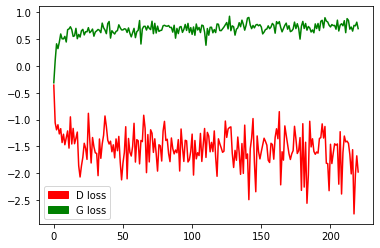

[Epoch 172/200] [Batch 21/32] [D loss: 0.139471] [G loss: 1.939376]


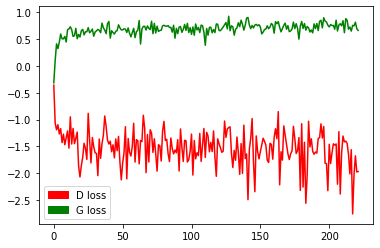

[Epoch 173/200] [Batch 14/32] [D loss: 0.226997] [G loss: 2.254306]


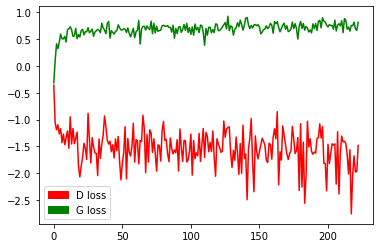

[Epoch 174/200] [Batch 7/32] [D loss: 0.293354] [G loss: 1.894236]


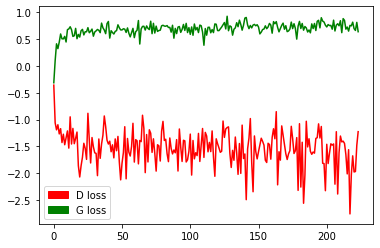

[Epoch 175/200] [Batch 0/32] [D loss: 0.336773] [G loss: 2.111090]


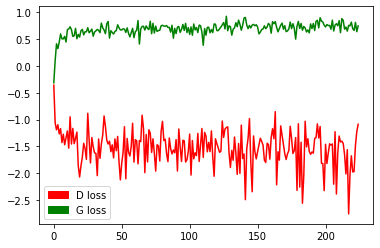

[Epoch 175/200] [Batch 25/32] [D loss: 0.176288] [G loss: 1.774127]


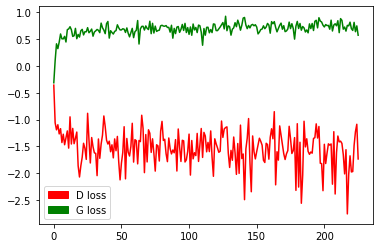

[Epoch 176/200] [Batch 18/32] [D loss: 0.296206] [G loss: 1.993606]


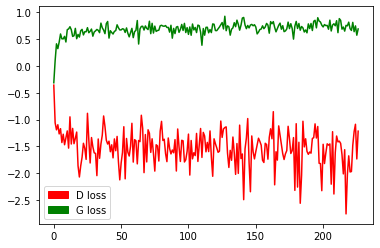

[Epoch 177/200] [Batch 11/32] [D loss: 0.193947] [G loss: 2.195587]


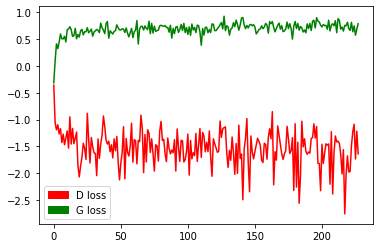

[Epoch 178/200] [Batch 4/32] [D loss: 0.302235] [G loss: 2.087754]


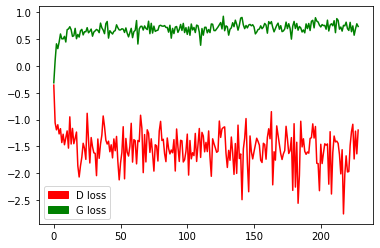

[Epoch 178/200] [Batch 29/32] [D loss: 0.259233] [G loss: 2.063587]


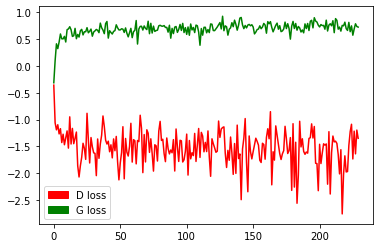

[Epoch 179/200] [Batch 22/32] [D loss: 0.177073] [G loss: 1.781839]


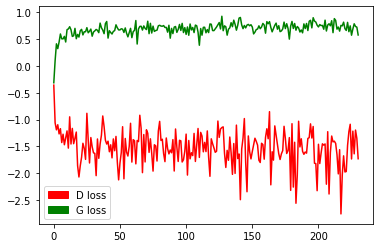

[Epoch 180/200] [Batch 15/32] [D loss: 0.233753] [G loss: 2.008694]


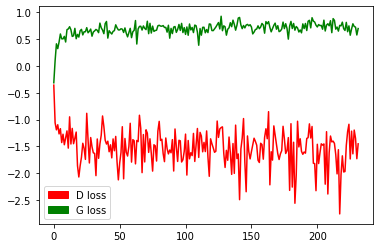

[Epoch 181/200] [Batch 8/32] [D loss: 0.328793] [G loss: 2.686346]


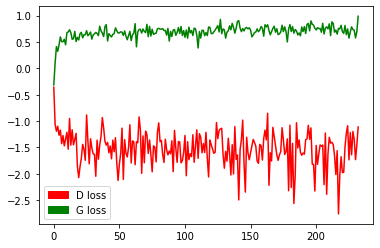

[Epoch 182/200] [Batch 1/32] [D loss: 0.404819] [G loss: 1.875036]


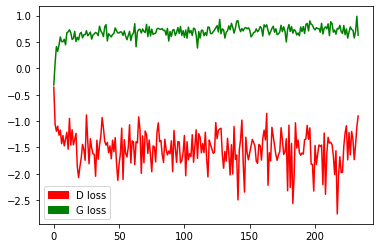

[Epoch 182/200] [Batch 26/32] [D loss: 0.189331] [G loss: 2.388222]


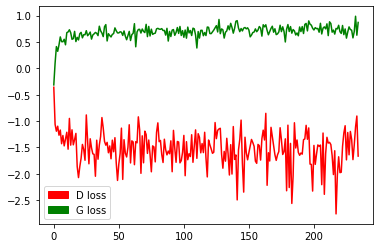

[Epoch 183/200] [Batch 19/32] [D loss: 0.295401] [G loss: 2.061656]


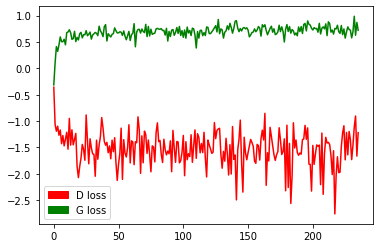

[Epoch 184/200] [Batch 12/32] [D loss: 0.260099] [G loss: 1.895837]


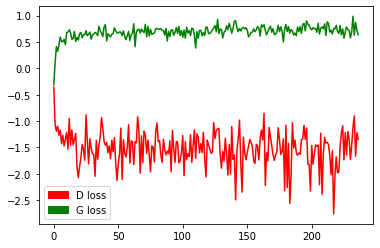

[Epoch 185/200] [Batch 5/32] [D loss: 0.163378] [G loss: 2.126615]


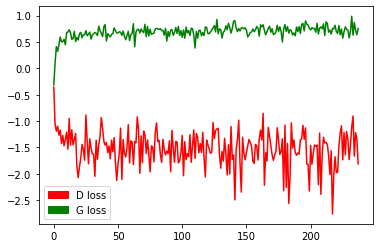

[Epoch 185/200] [Batch 30/32] [D loss: 0.229228] [G loss: 2.048784]


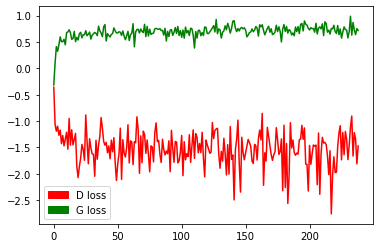

[Epoch 186/200] [Batch 23/32] [D loss: 0.196497] [G loss: 2.107109]


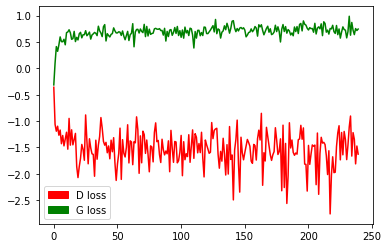

[Epoch 187/200] [Batch 16/32] [D loss: 0.080566] [G loss: 2.546540]


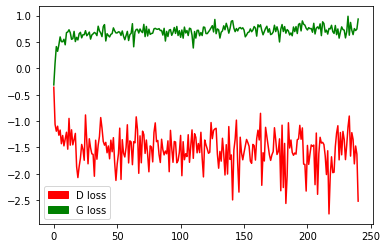

[Epoch 188/200] [Batch 9/32] [D loss: 0.231397] [G loss: 2.180036]


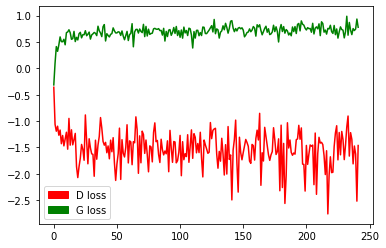

[Epoch 189/200] [Batch 2/32] [D loss: 0.261369] [G loss: 2.012562]


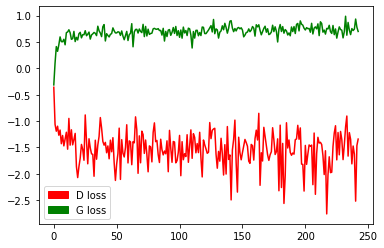

[Epoch 189/200] [Batch 27/32] [D loss: 0.202491] [G loss: 2.128700]


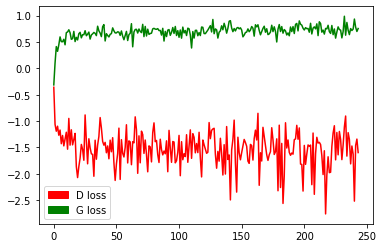

[Epoch 190/200] [Batch 20/32] [D loss: 0.229246] [G loss: 1.810052]


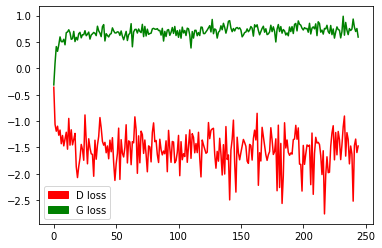

[Epoch 191/200] [Batch 13/32] [D loss: 0.197097] [G loss: 1.997611]


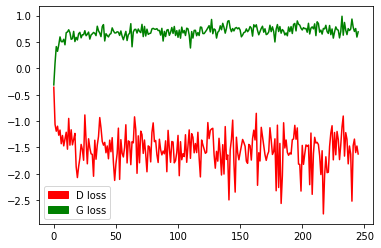

[Epoch 192/200] [Batch 6/32] [D loss: 0.233033] [G loss: 2.059724]


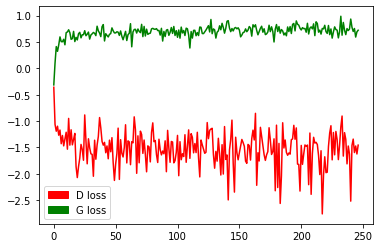

[Epoch 192/200] [Batch 31/32] [D loss: 0.231842] [G loss: 1.892975]


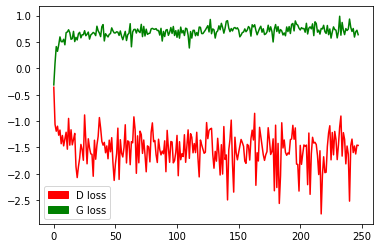

[Epoch 193/200] [Batch 24/32] [D loss: 0.230394] [G loss: 2.136699]


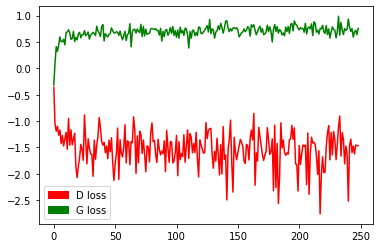

[Epoch 194/200] [Batch 17/32] [D loss: 0.293133] [G loss: 2.151950]


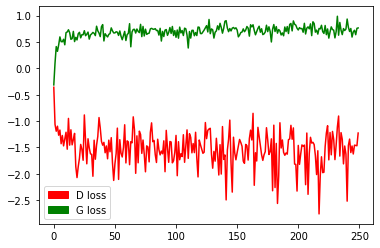

[Epoch 195/200] [Batch 10/32] [D loss: 0.311644] [G loss: 2.450479]


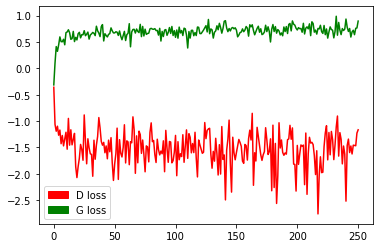

[Epoch 196/200] [Batch 3/32] [D loss: 0.138528] [G loss: 1.962033]


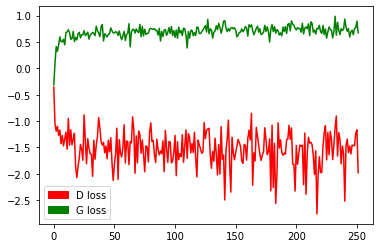

[Epoch 196/200] [Batch 28/32] [D loss: 0.234121] [G loss: 2.212392]


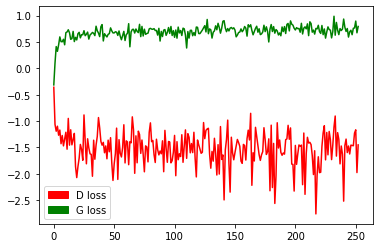

[Epoch 197/200] [Batch 21/32] [D loss: 0.231552] [G loss: 1.843809]


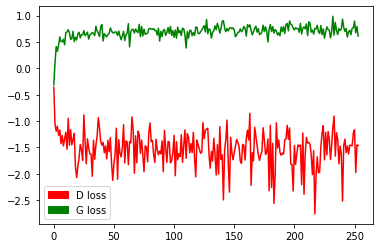

[Epoch 198/200] [Batch 14/32] [D loss: 0.167197] [G loss: 2.042937]


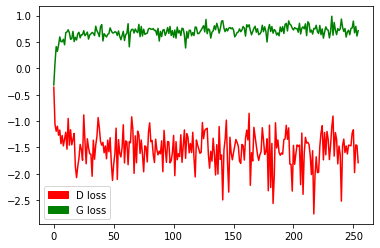

[Epoch 199/200] [Batch 7/32] [D loss: 0.229874] [G loss: 1.999709]


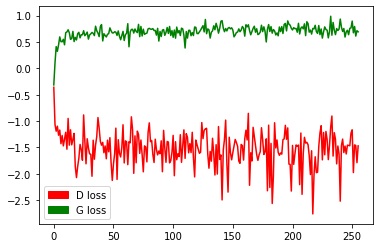

In [36]:
# Обучение моделей GAN
#######################################
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='D loss')
green_patch = mpatches.Patch(color='green', label='G loss')



for epoch in range(n_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        
##################### Лейблы для данных: 1 - настоящие, 0 - сгенерированные ########
        valid = torch.FloatTensor(batch_size, 1).fill_(1.0)
        fake = torch.FloatTensor(batch_size, 1).fill_(0.0)

        real_imgs = imgs.type(torch.FloatTensor)


######################  Тренировка генератора    ##########################

        optimizer_G.zero_grad()
    
        #генерация шума
        z = torch.FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim)))
        
        # Генерируем даные Генератором на основе шума
        gen_imgs = generator(z)
        
        # Подаем сгенерированые данные на Дискриминатор 
        validity = discriminator(gen_imgs)
        
        # Тут сравниваем предсказанные значения Дискриминатора(на основе сгенерировнных данных) с настоящими
        g_loss = adversarial_loss(validity, valid)
        
        # Делаем шаг обучения нашего Генератора
        g_loss.backward()
        optimizer_G.step()

######################  Тренировка дискриминатора    ##########################

        optimizer_D.zero_grad()
        
        # Получаем предсказания дискриминатора на основе реальных данных
        real_pred = discriminator(real_imgs)
        
        # Тут сравниваем предсказанные значения Дискриминатора(на основе настоящих данных) с настоящими
        d_real_loss = adversarial_loss(real_pred, valid)
        
        # Опять делаем предсказание на Дискриминаторе с помощью сгенерированных данных
        fake_pred = discriminator(gen_imgs.detach())
        
        # расчитываем ошибку предсказанного с фейковыми лейблами
        d_fake_loss = adversarial_loss(fake_pred, fake)
        
        # И усредняем два лосса в один
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()
        
######## Отображение процесса обучения и вывод функций потерь ############
        batches_done = epoch * len(train_loader) + i
    
        if batches_done % sample_interval == 0:
            with torch.no_grad():
                plt.clf()

                print("[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"% (epoch, n_epochs, i, len(train_loader), d_loss.item(), g_loss.item()) ) 


                d_loss = d_loss.cpu().detach()
                g_loss = g_loss.cpu().detach()


                d_loss_history.append(d_loss)
                g_loss_history.append(g_loss)

                plt.plot(np.log(np.array(d_loss_history)), label='D loss', color = 'red')
                plt.plot(np.log(np.array(g_loss_history)), label='G loss', color = 'green')
                plt.legend(handles=[red_patch, green_patch])
                plt.show()


In [37]:
# Проверка образцов, сгенерированных GAN
########################################################
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

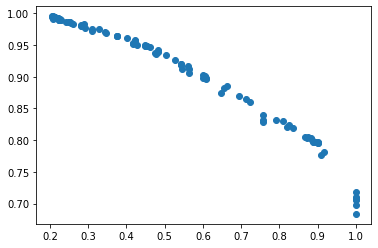

In [38]:
generated_samples = generated_samples.detach()
plt.scatter(generated_samples[:, 0], generated_samples[:, 1])